In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_znorm_rolling_avg_std_window_513_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

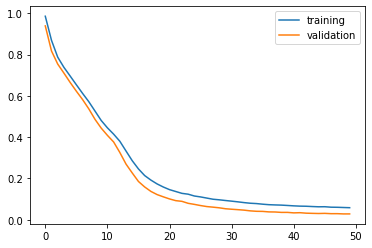

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [1 0 2]
group_bunches: [454. 158. 579.]
group_bunches sorted: [158. 454. 579.]
restore_index: [1 0 2]
group_bunches restored: [454. 158. 579.]
bunch_sorted_index: [1 0 2]
group_bunches: [239. 217. 320.]
group_bunches sorted: [217. 239. 320.]
restore_index: [1 0 2]
group_bunches restored: [239. 217. 320.]
bunch_sorted_index: [0 2 1]
group_bunches: [ 827. 2018. 1046.]
group_bunches sorted: [ 827. 1046. 2018.]
restore_index: [0 2 1]
group_bunches restored: [ 827. 2018. 1046.]
bunch_sorted_index: [0 2 1]
group_bunches: [ 583. 3145. 1132.]
group_bunches sorted: [ 583. 1132. 3145.]
restore_index: [0 2 1]
group_bunches restored: [ 583. 3145. 1132.]

50/50 [==============================] - 60s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
6439  Inst  7478     1     h  7 2018-11-27 10:09:16   
4056  Inst  6355     1     h  7 2017-11-01 18:18:34   
7530  Inst  7018     1     h  7 2018-08-04 15:44:25   
3288  Inst  6355     1     h  7 2017-11-01 18:18:34   
6846  Inst  6890     1     h  7 2018-07-06 01:31:14   

                                                   file  n_bunches  \
6439  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...         12   
4056  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...        428   
7530  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7018/...       2556   
3288  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...        428   
6846  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...       1452   

      bunch_index  bunch_number  ts_length  chunk  
6439        898.0           5.0      65536     25  
4056        441.0         234.0      65536     15  
7530       1619.0        1206.0      65536     29  
3288        441.0         234.0      65536     12  
6846       1772.0         740.0      65536     26

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 996ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  7031     1     h  7 2018-08-06 17:40:15   
1244  Inst  6691     1     h  7 2018-05-16 16:54:14   
5767  Inst  7378     1     h  7 2018-10-28 23:49:14   
7206  Inst  6585     1     h  7 2018-04-21 12:46:15   
7624  Inst  7031     1     h  7 2018-08-06 17:40:15   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7031/...       2556   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6691/...        449   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7378/...        456   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6585/...        456   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7031/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
4808       1589.0        1176.0      65536     18  
1244       2102.0         215.0      65536      4  
5767        992.0         109.0      65536     22  
7206        686.0         320.0      65536     28  
7624       1589.0        1176.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

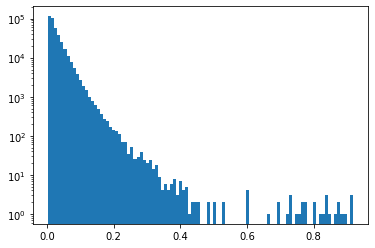

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

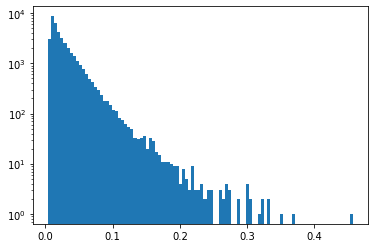

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.0346405970550306
type                                                         Inst
fill                                                         7478
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 10:09:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...
n_bunches                                                      12
bunch_index                                                   898
bunch_number                                                    5
ts_length                                                   65536
chunk                                                          25
Name: 6439, dtype: object


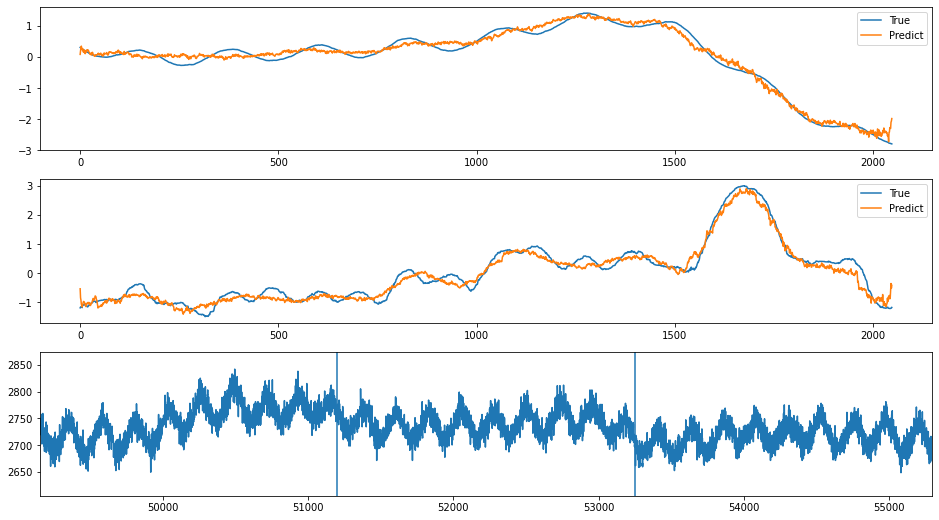

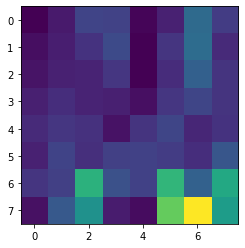

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 268429
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          12
Name: 3102, dtype: object


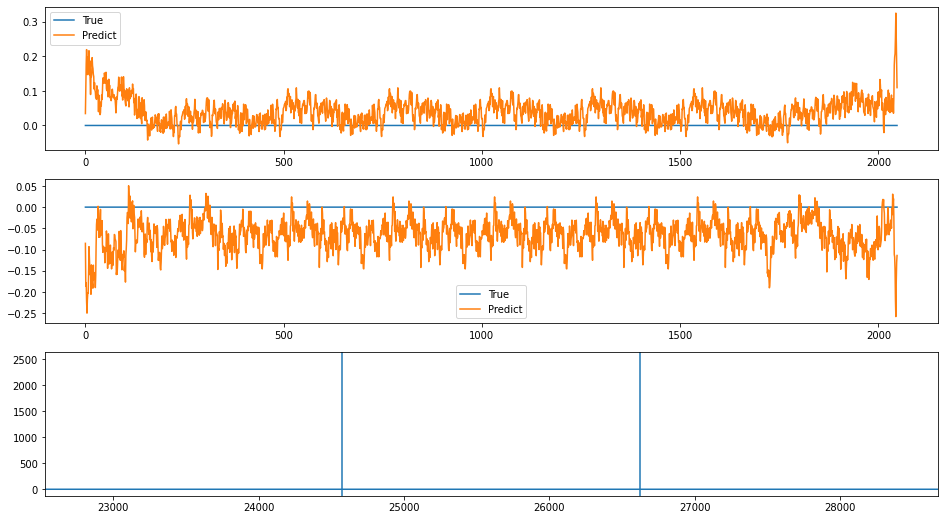

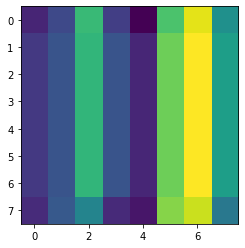

index: 267326
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                           8
Name: 2078, dtype: object


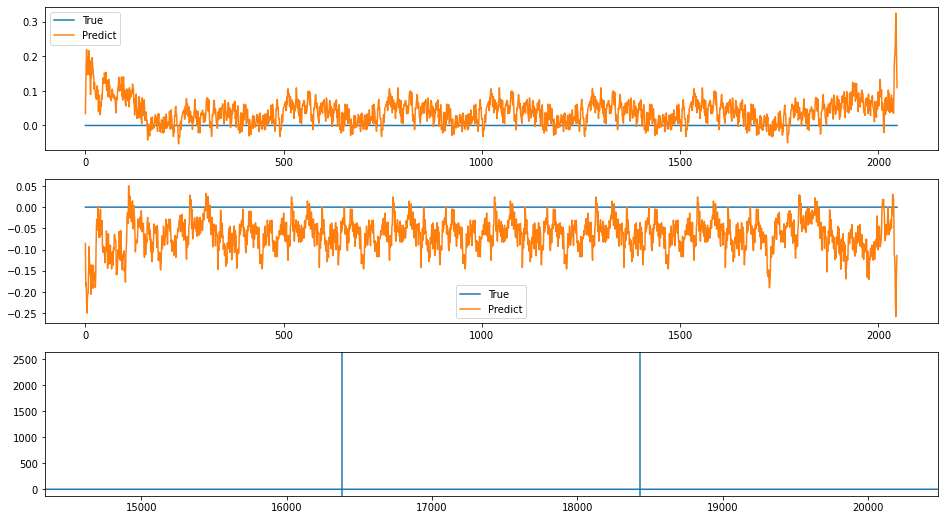

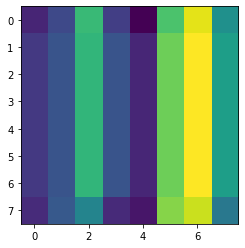

index: 269466
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          30
Name: 7710, dtype: object


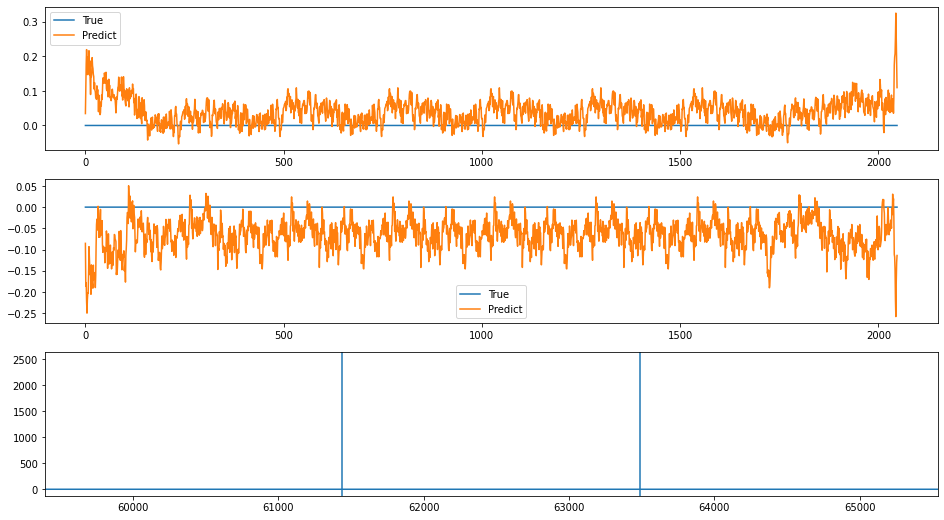

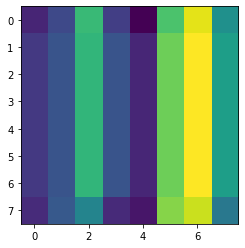

index: 269651
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          17
Name: 4382, dtype: object


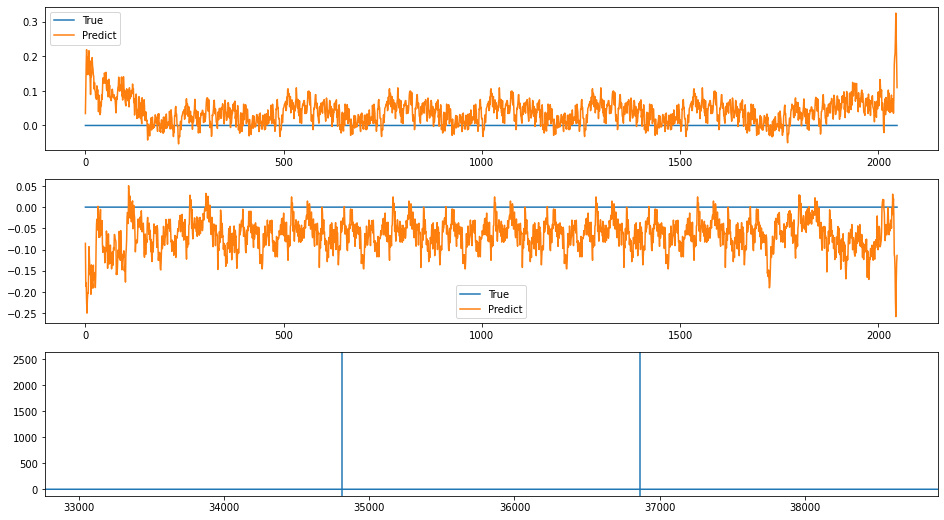

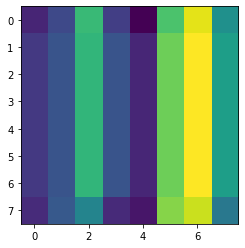

index: 263049
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          13
Name: 3358, dtype: object


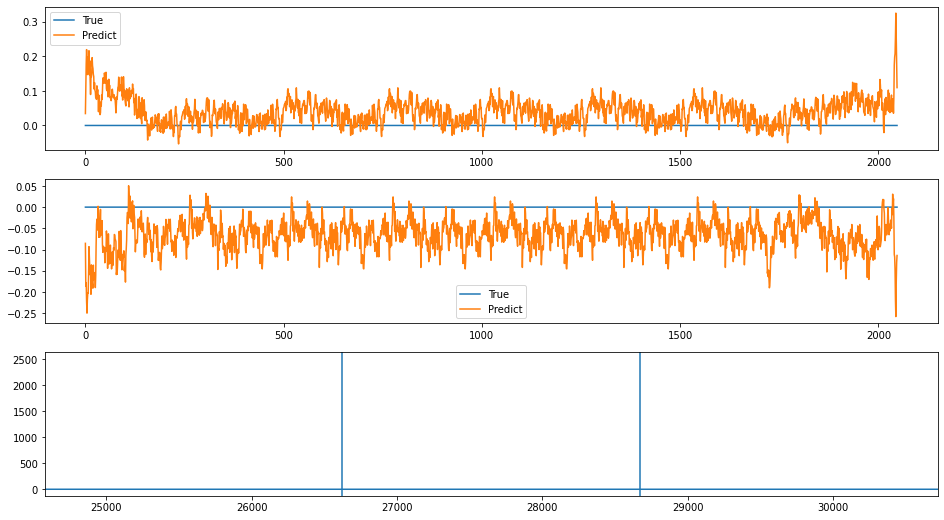

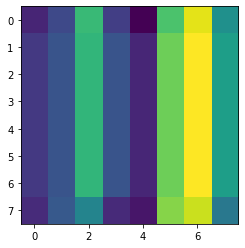

index: 268528
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          15
Name: 3870, dtype: object


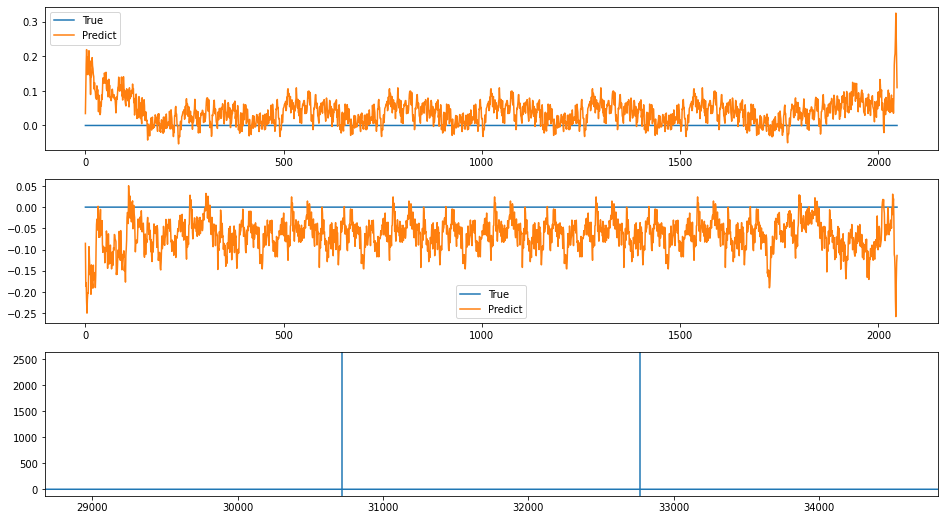

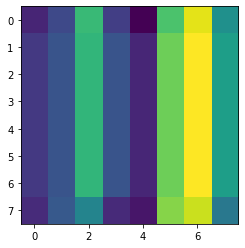

index: 263810
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          14
Name: 3614, dtype: object


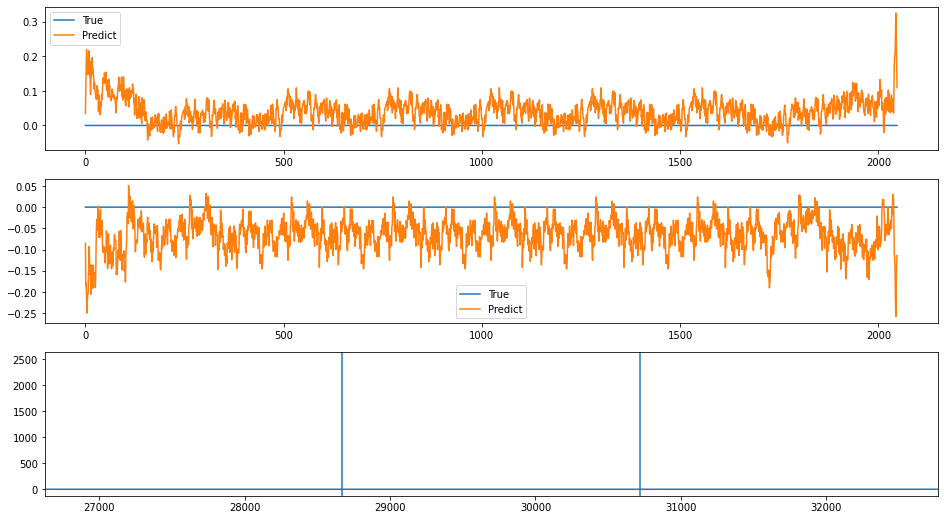

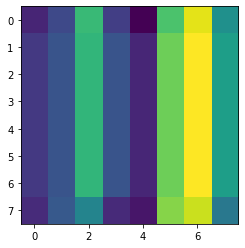

index: 266003
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          28
Name: 7198, dtype: object


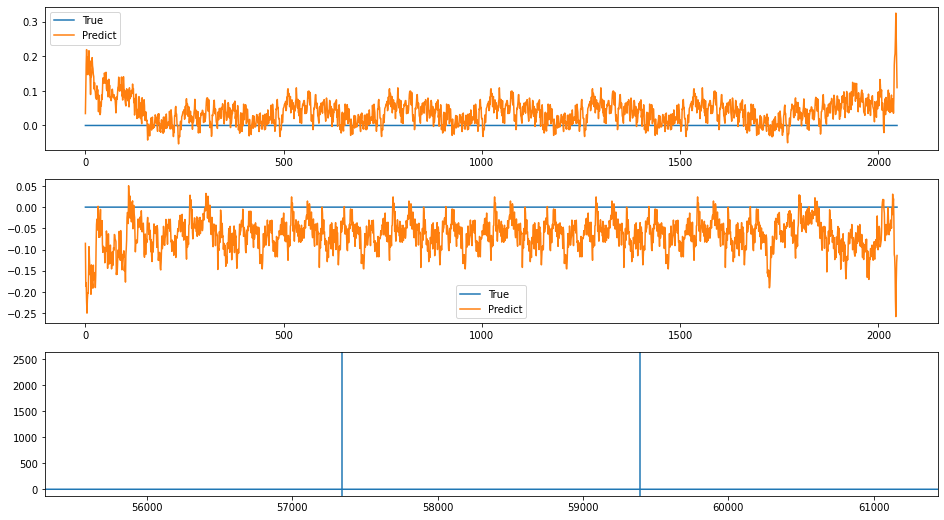

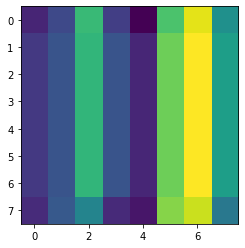

index: 264398
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          26
Name: 6686, dtype: object


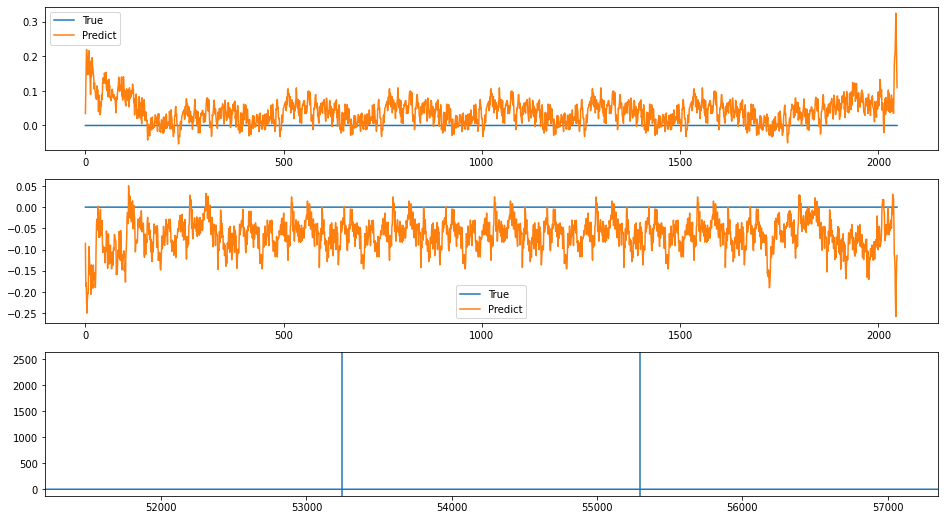

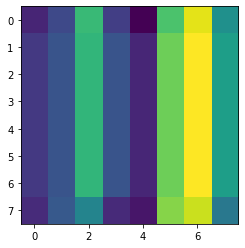

index: 262728
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          27
Name: 6942, dtype: object


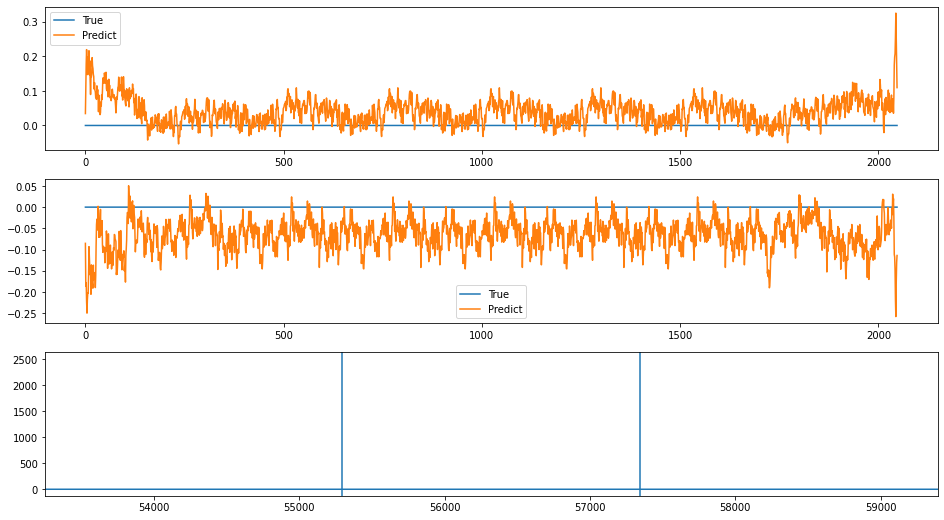

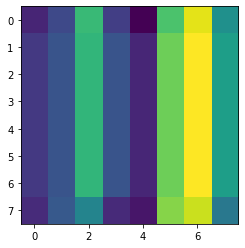

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 217383
Error: 0.916852491373401
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           3
Name: 894, dtype: object


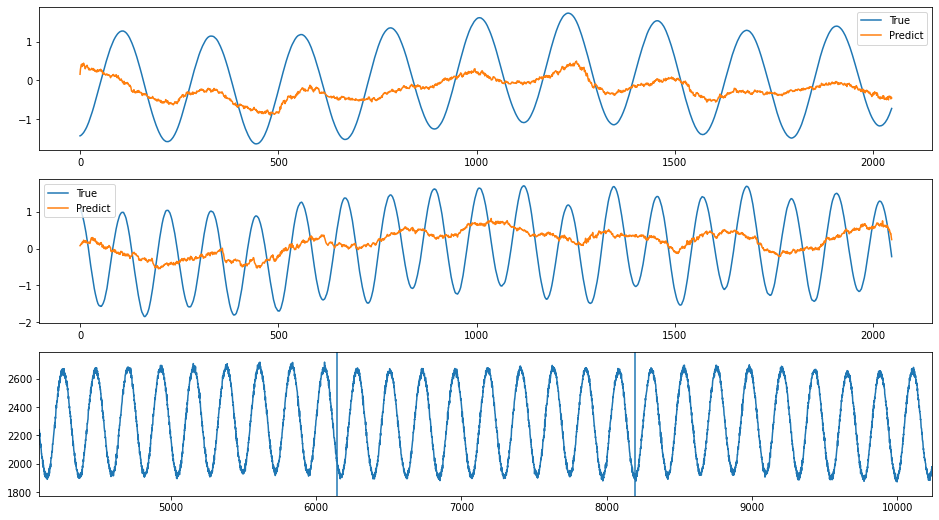

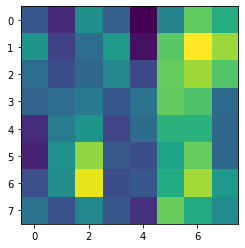

index: 240762
Error: 0.9122945169444833
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:30:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     972
bunch_index                                                  1727
bunch_number                                                  911
ts_length                                                   65536
chunk                                                           5
Name: 1454, dtype: object


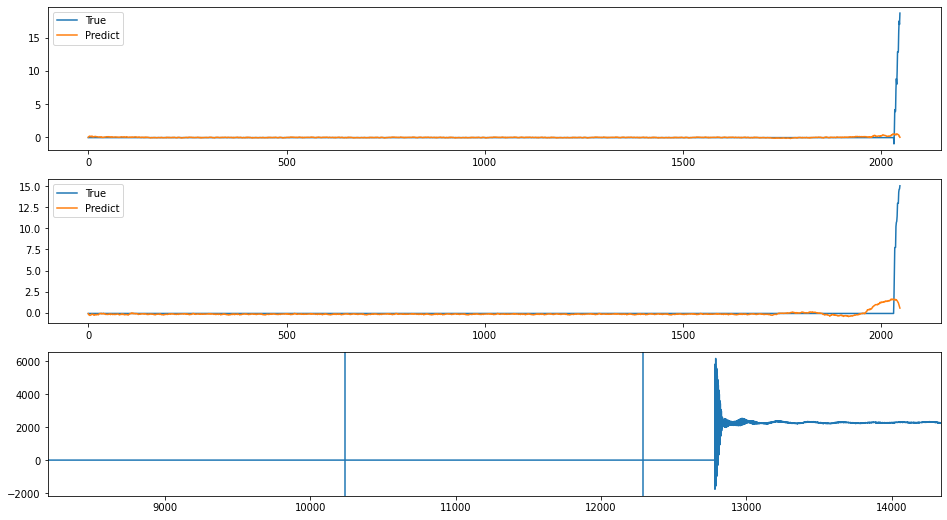

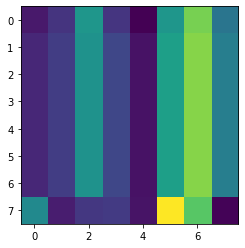

index: 41482
Error: 0.9122590251509698
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:30:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     972
bunch_index                                                  1778
bunch_number                                                  943
ts_length                                                   65536
chunk                                                           5
Name: 1435, dtype: object


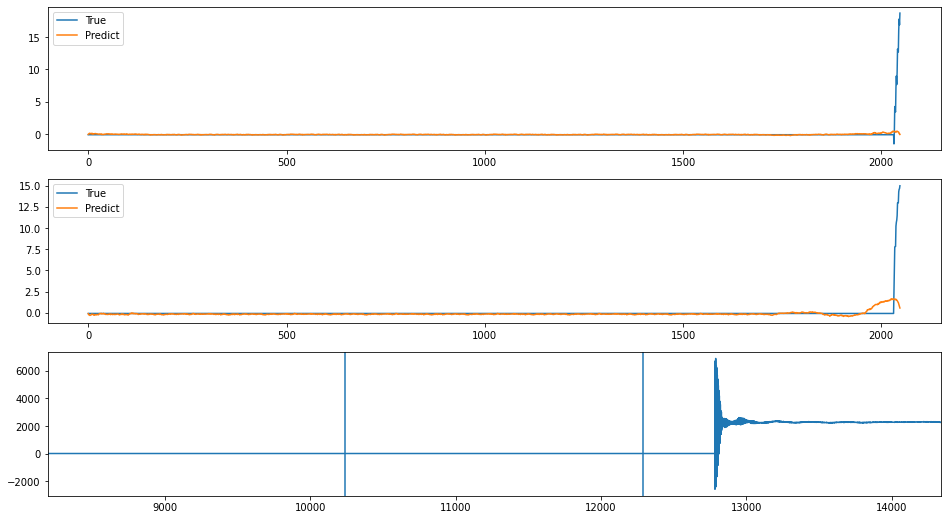

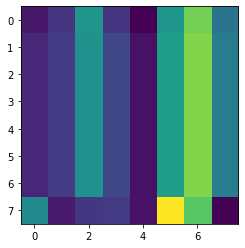

index: 221800
Error: 0.8900572875843205
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           5
Name: 1406, dtype: object


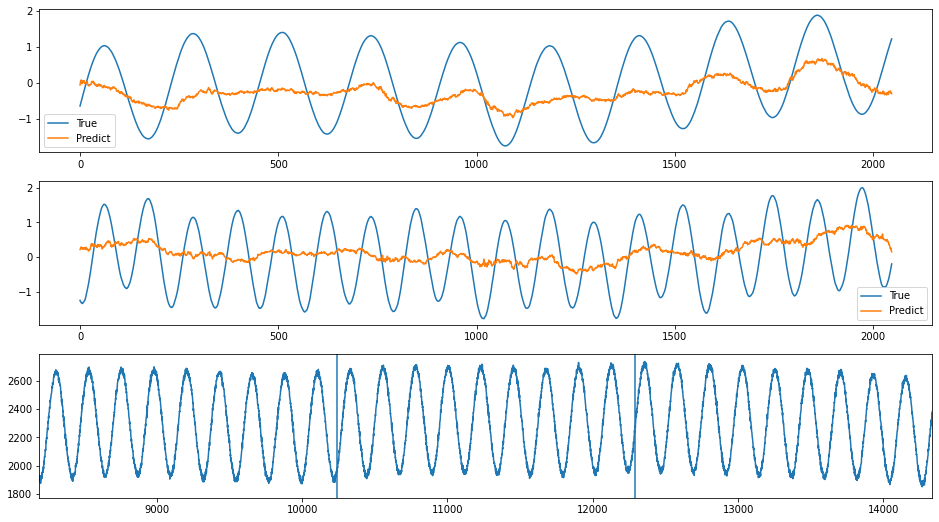

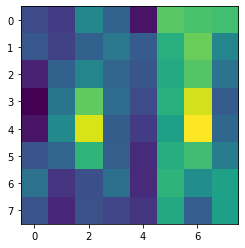

index: 217444
Error: 0.8878854457330743
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          27
Name: 7038, dtype: object


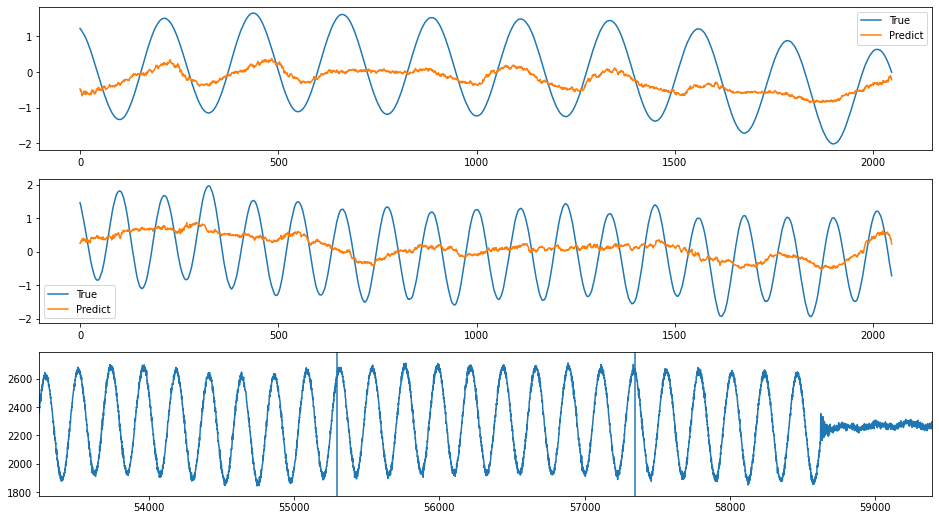

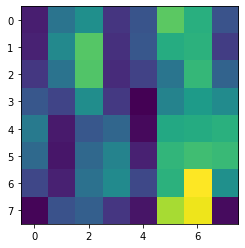

index: 314738
Error: 0.8755295146000776
type                                                         Inst
fill                                                         6415
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-25 04:15:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6415/...
n_bunches                                                     524
bunch_index                                                   850
bunch_number                                                  445
ts_length                                                   65536
chunk                                                           5
Name: 1505, dtype: object


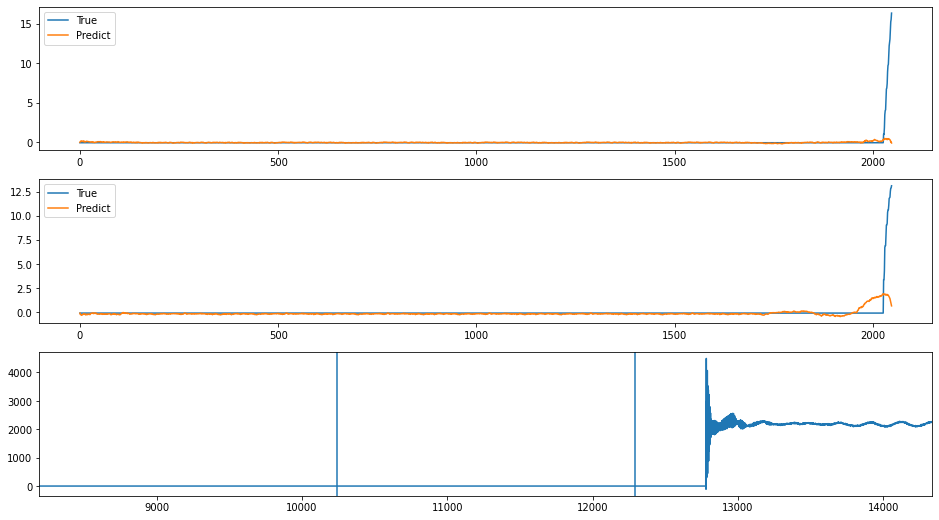

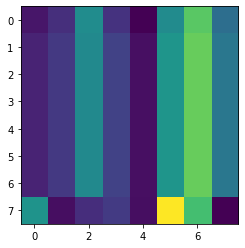

index: 218894
Error: 0.8728178521834316
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          17
Name: 4478, dtype: object


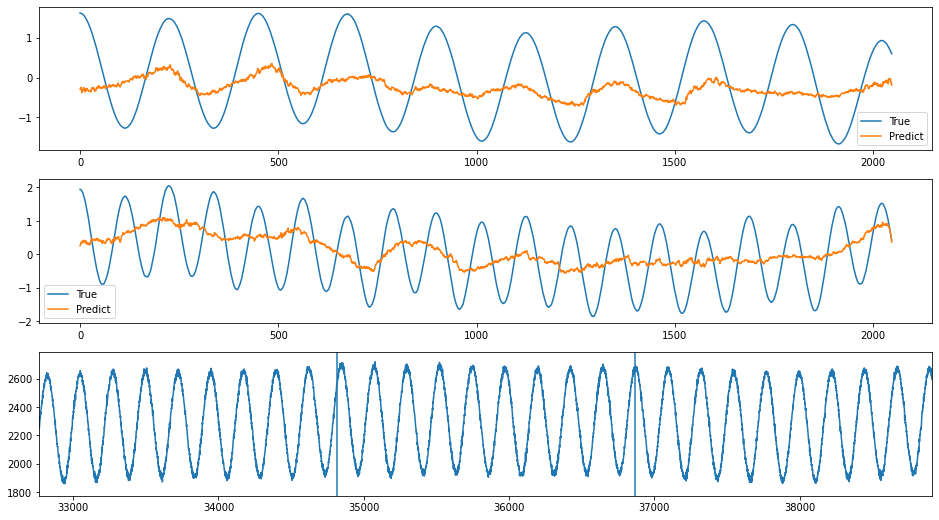

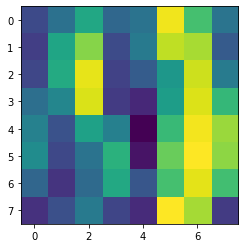

index: 219895
Error: 0.8657141941501554
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           2
Name: 638, dtype: object


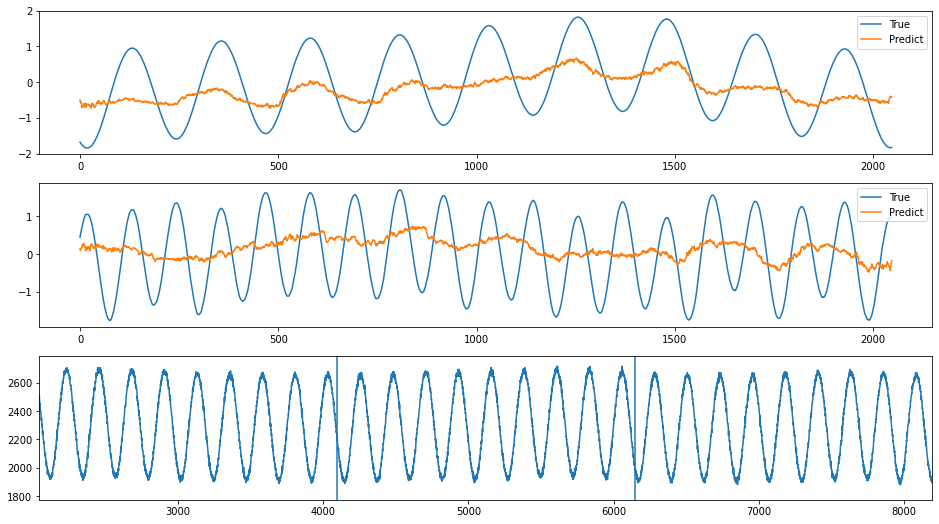

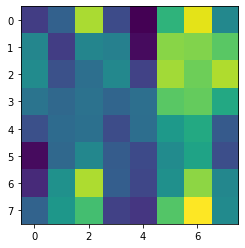

index: 217851
Error: 0.8457373844589908
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          13
Name: 3454, dtype: object


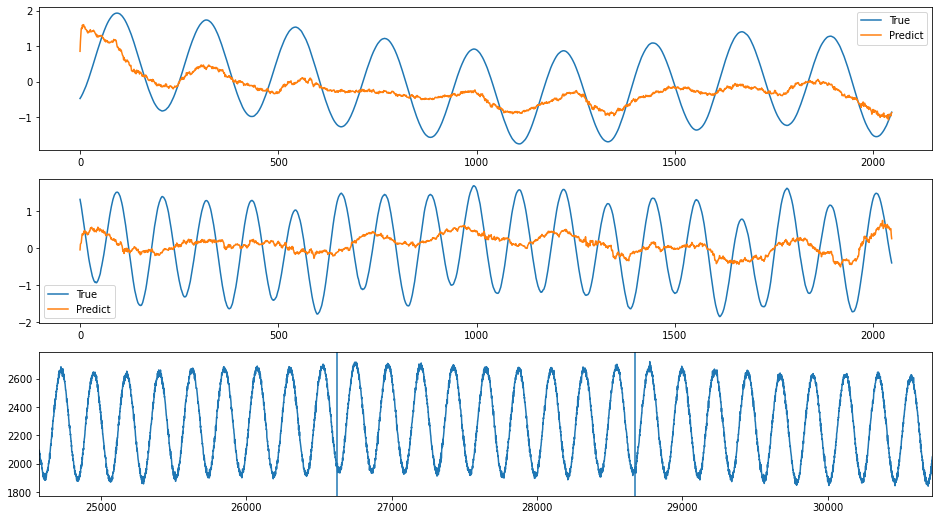

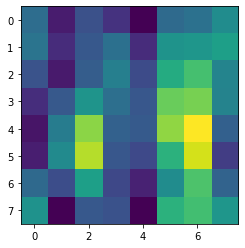

index: 214683
Error: 0.8366995109588758
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           8
Name: 2174, dtype: object


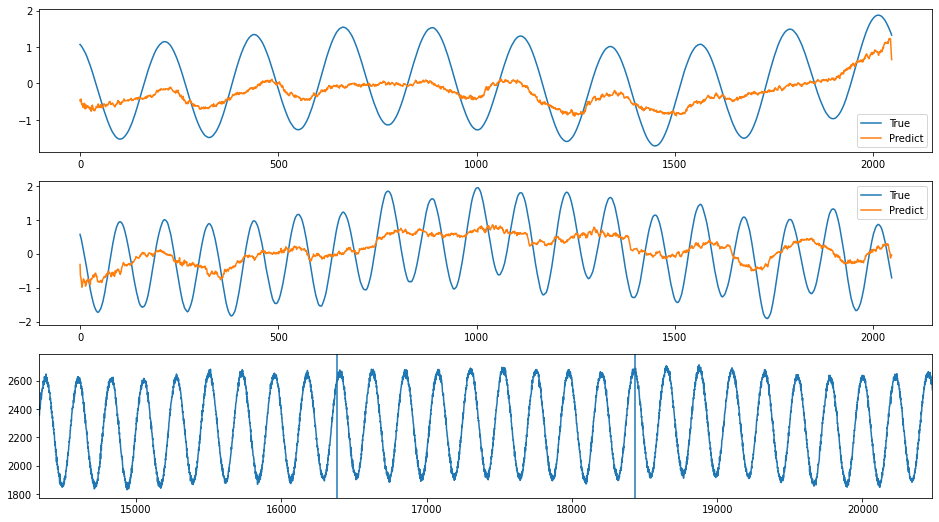

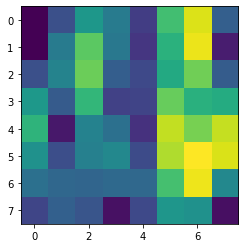

index: 215595
Error: 0.8365415107607428
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          25
Name: 6526, dtype: object


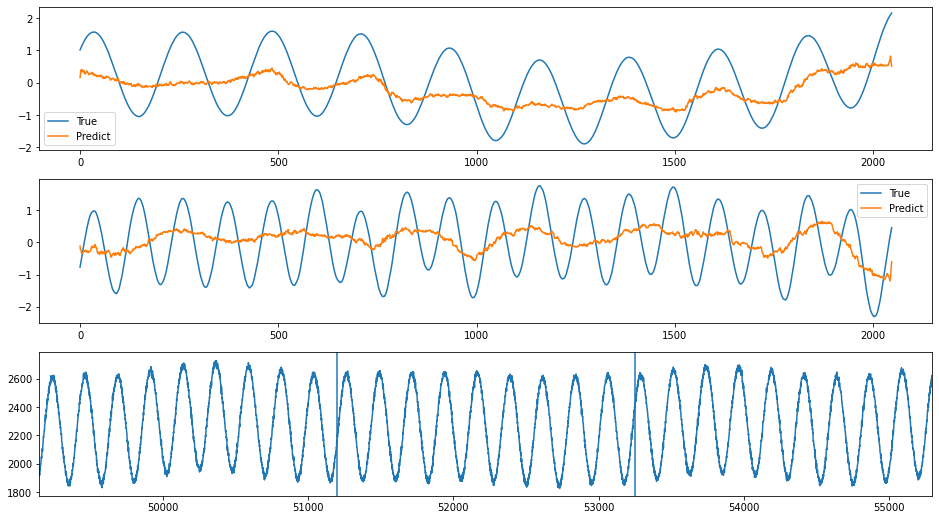

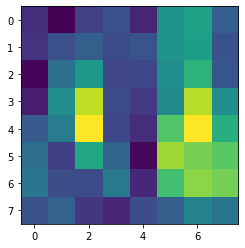

index: 217109
Error: 0.8354851034097955
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           1
Name: 382, dtype: object


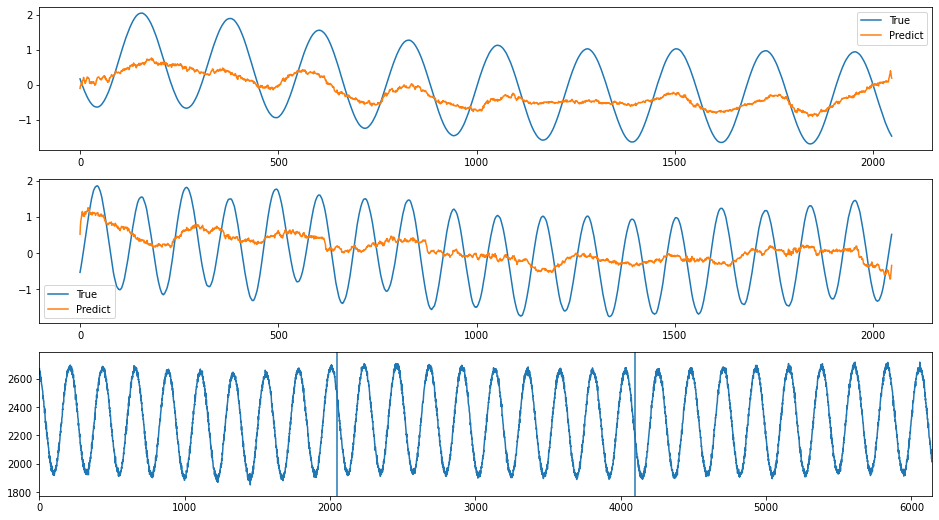

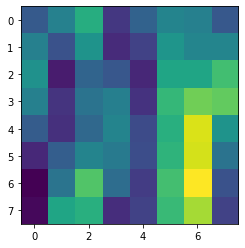

index: 219544
Error: 0.8306240056800502
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          19
Name: 4990, dtype: object


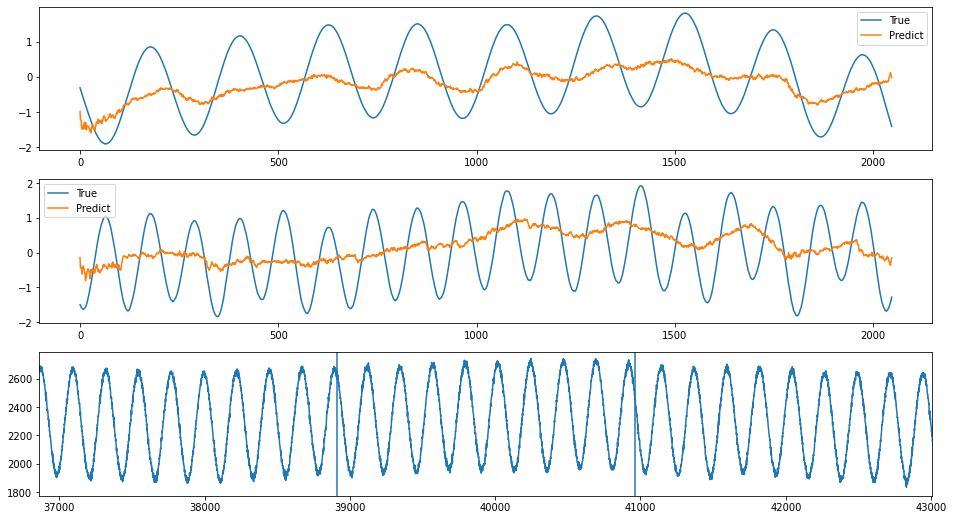

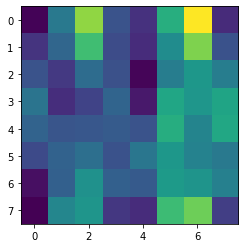

index: 217930
Error: 0.8243321862351074
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          11
Name: 2942, dtype: object


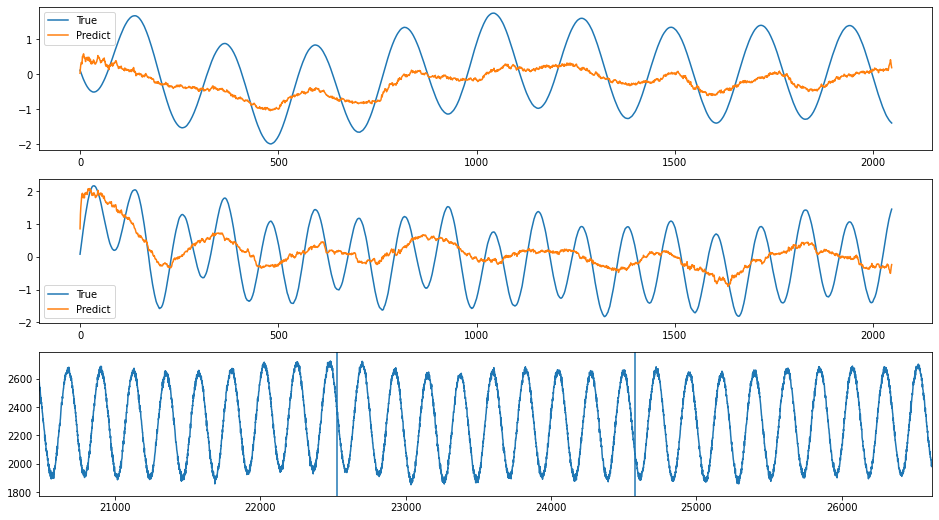

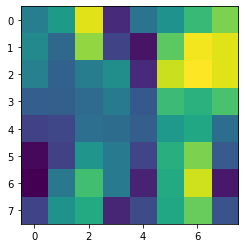

index: 217790
Error: 0.8007082356044828
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          21
Name: 5502, dtype: object


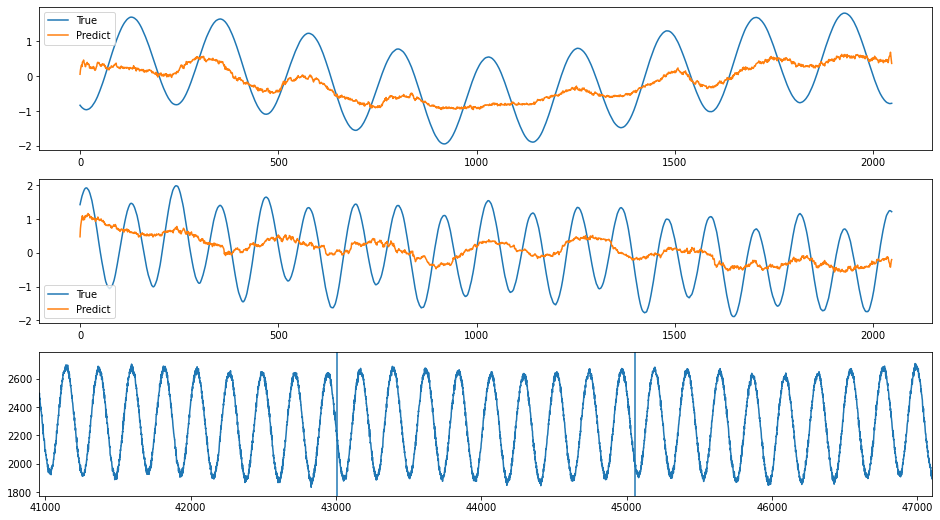

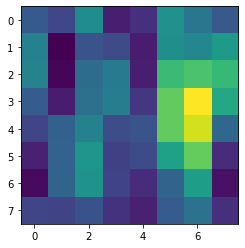

index: 218475
Error: 0.7987351434910894
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          15
Name: 3966, dtype: object


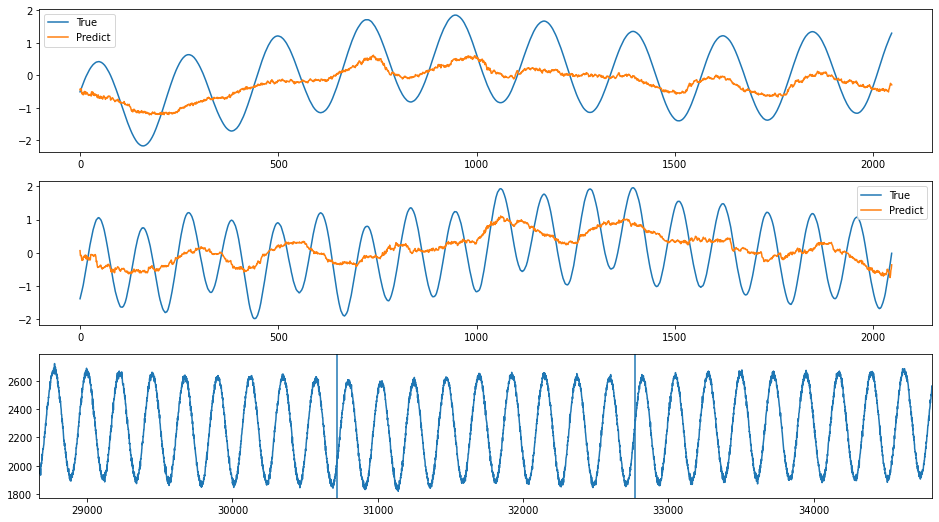

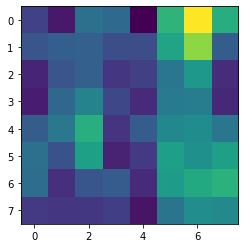

index: 216312
Error: 0.7755446066289455
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          16
Name: 4222, dtype: object


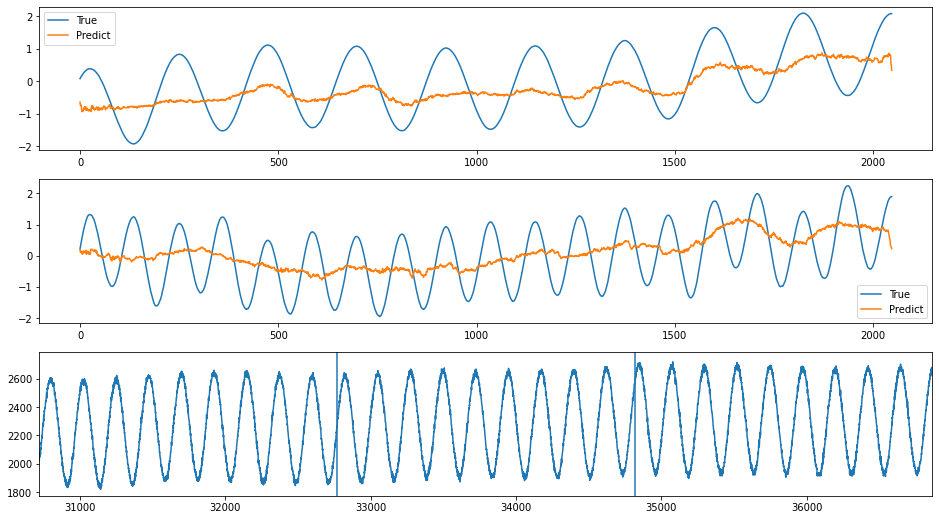

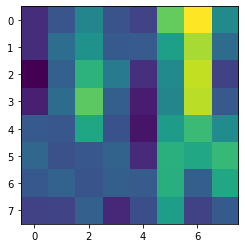

index: 217929
Error: 0.7744374277167141
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           4
Name: 1150, dtype: object


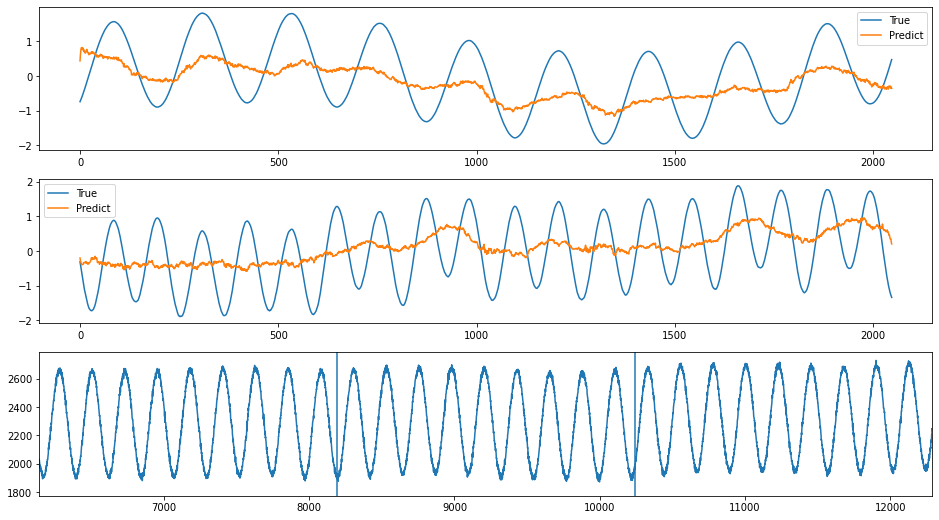

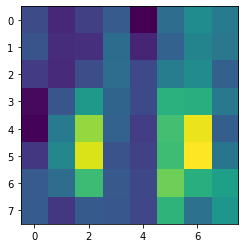

index: 218865
Error: 0.7679249543909825
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          23
Name: 6014, dtype: object


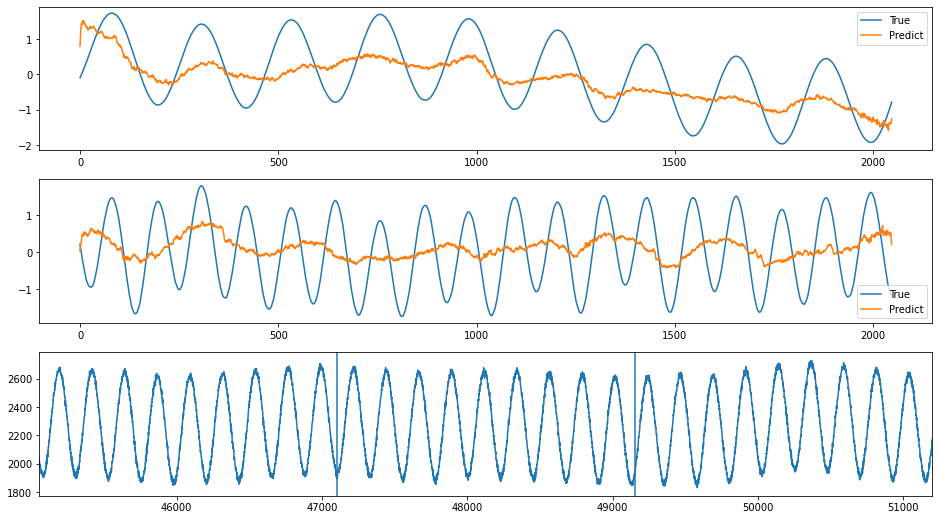

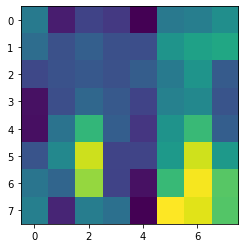

index: 215853
Error: 0.7660677173294803
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          20
Name: 5246, dtype: object


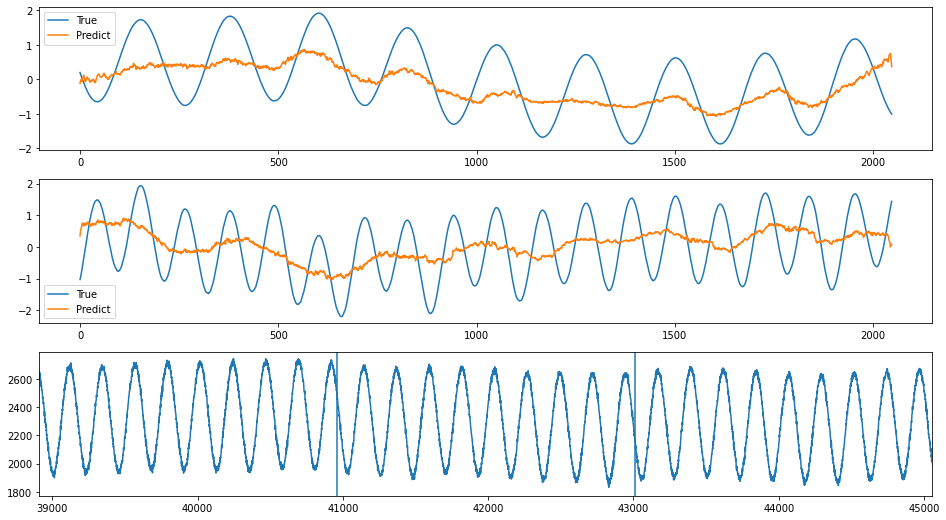

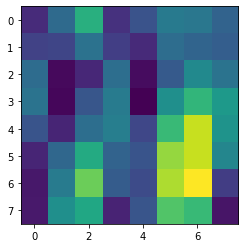

index: 222080
Error: 0.7565230873188494
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          12
Name: 3198, dtype: object


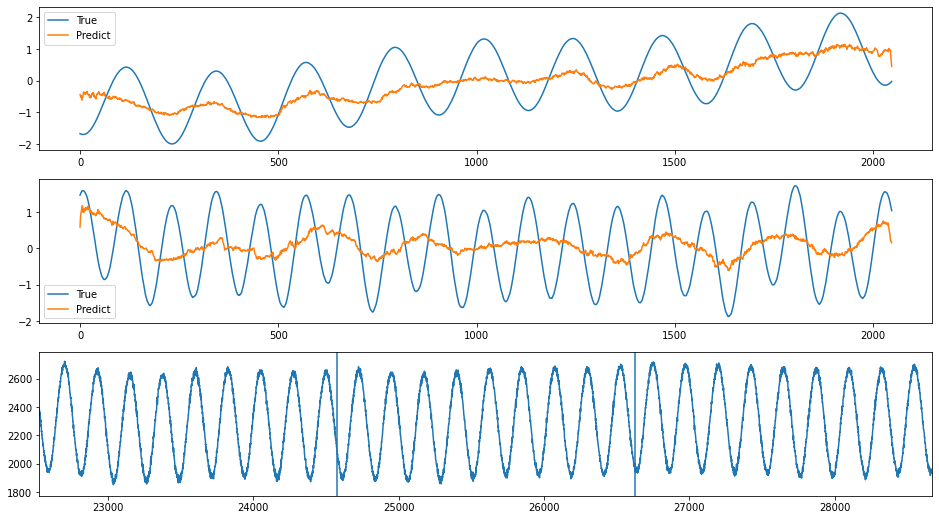

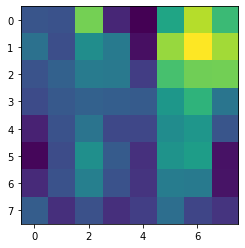

index: 217590
Error: 0.7509179079488689
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           0
Name: 126, dtype: object


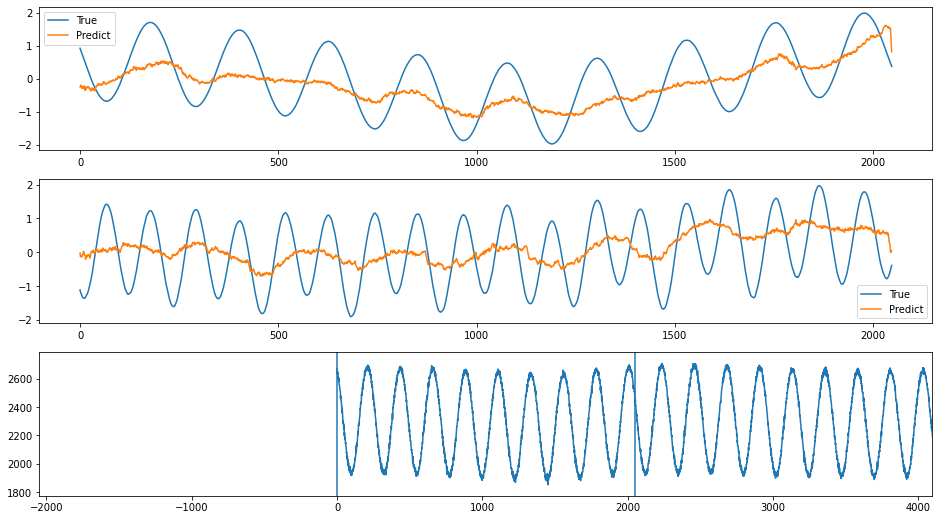

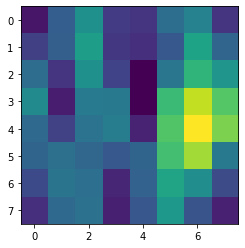

index: 216544
Error: 0.7342967924042838
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          18
Name: 4734, dtype: object


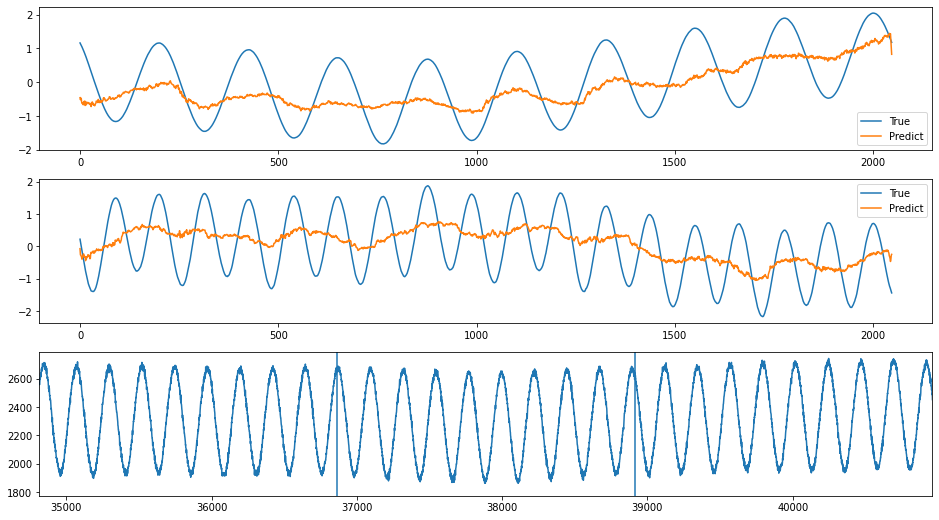

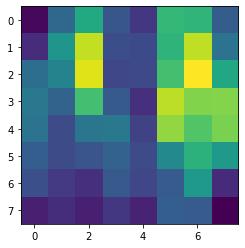

index: 215503
Error: 0.7298439266776213
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           7
Name: 1918, dtype: object


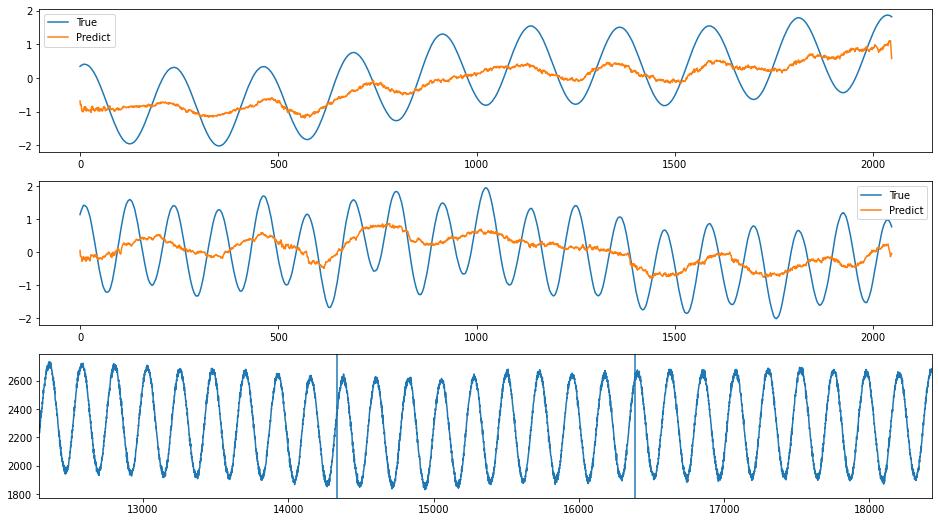

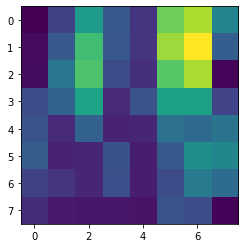

index: 221089
Error: 0.7256710323734543
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          14
Name: 3710, dtype: object


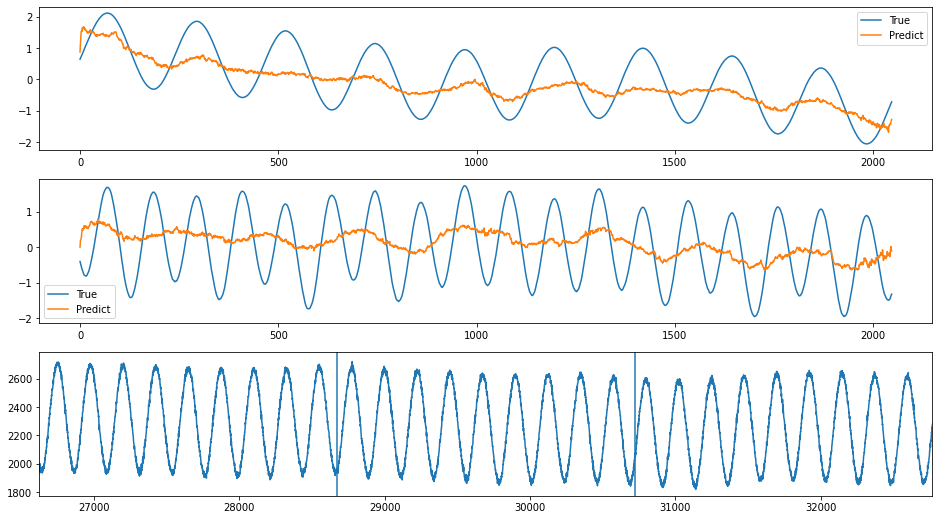

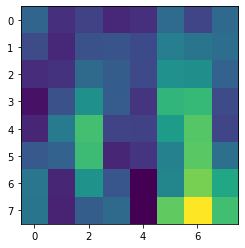

index: 220418
Error: 0.7249294957440395
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          22
Name: 5758, dtype: object


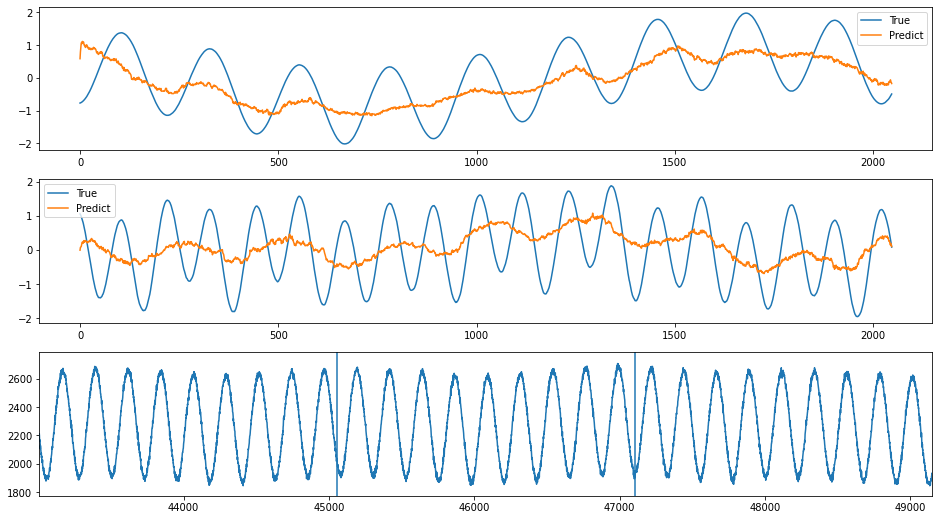

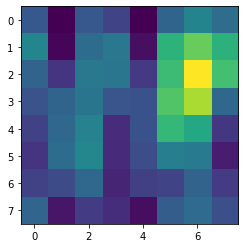

index: 215300
Error: 0.6939341720454905
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           9
Name: 2430, dtype: object


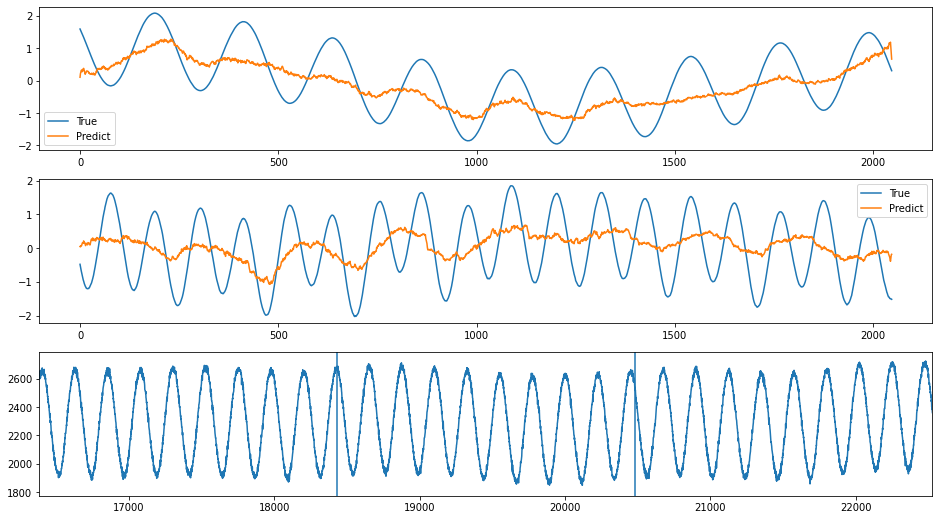

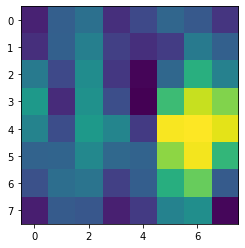

index: 221967
Error: 0.6927101011247134
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          26
Name: 6782, dtype: object


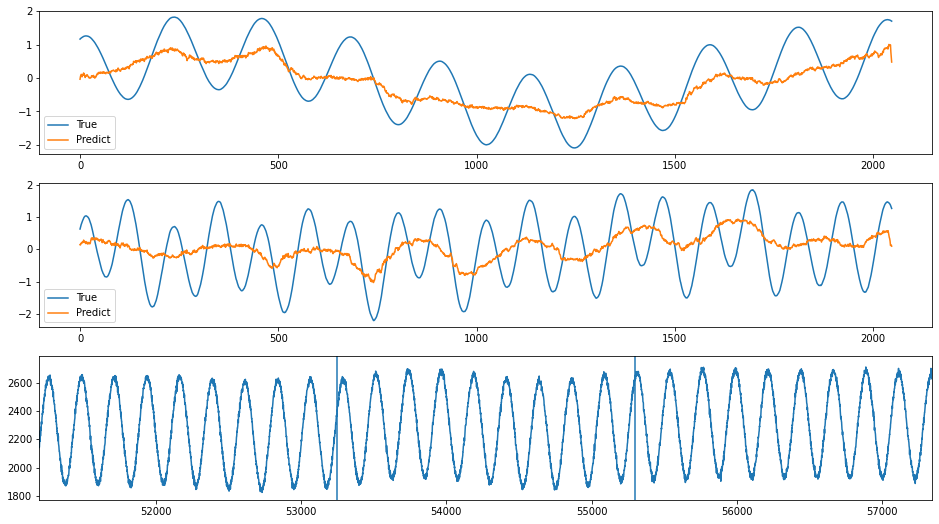

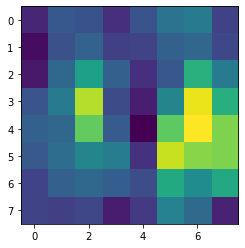

index: 215527
Error: 0.661495531463007
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          10
Name: 2686, dtype: object


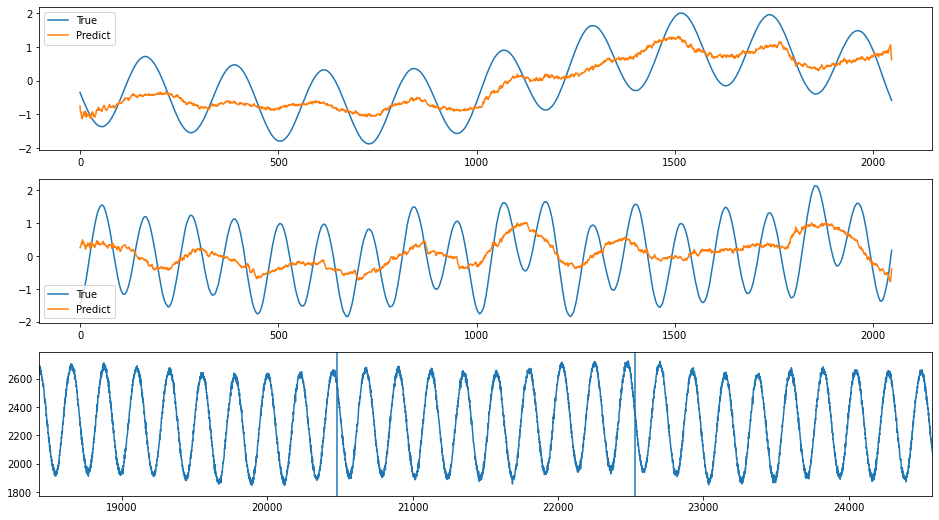

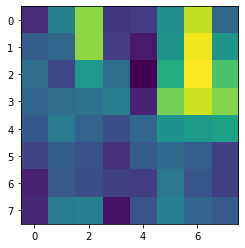

index: 214613
Error: 0.6039405138835034
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          24
Name: 6270, dtype: object


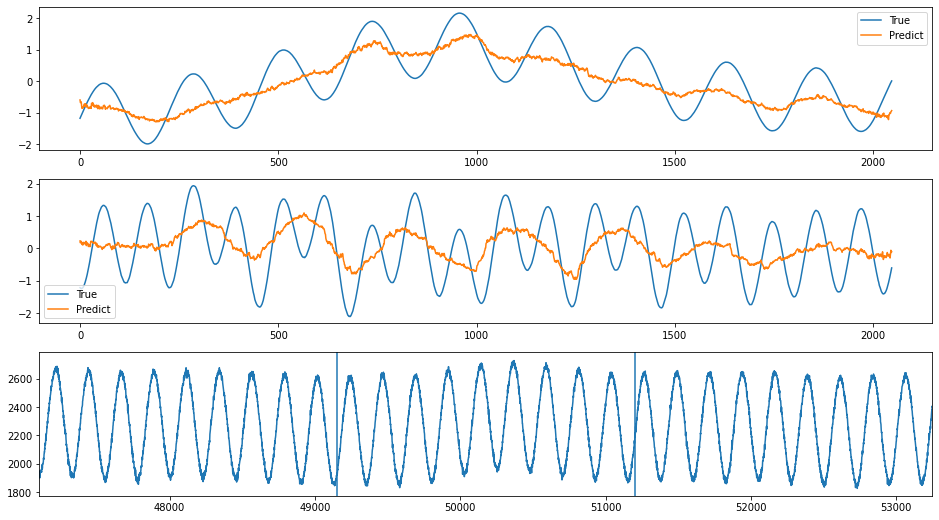

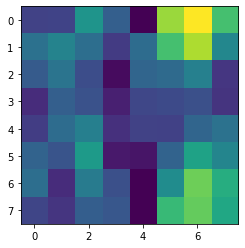

index: 263440
Error: 0.600613033777211
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                           4
Name: 1054, dtype: object


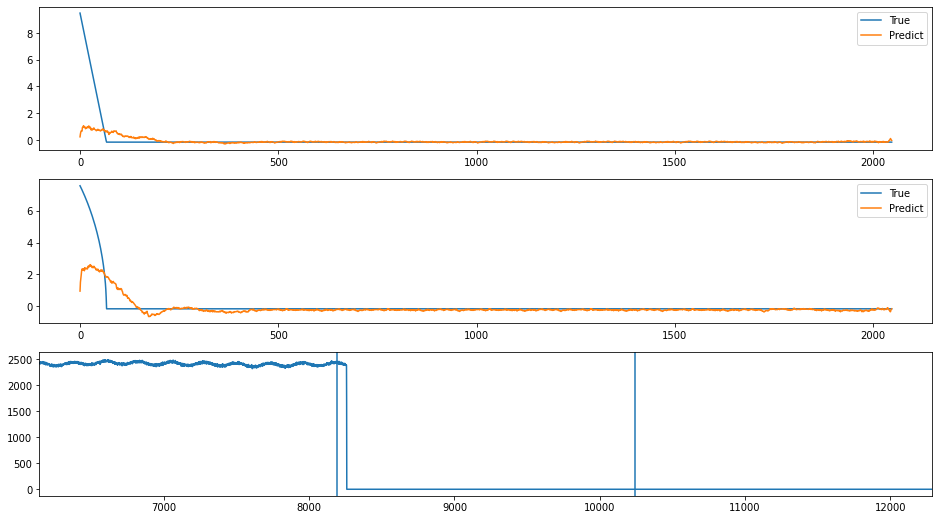

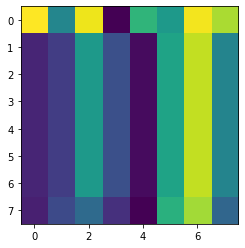

index: 130219
Error: 0.5999802263011317
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                   178
bunch_number                                                   83
ts_length                                                   65536
chunk                                                           4
Name: 1094, dtype: object


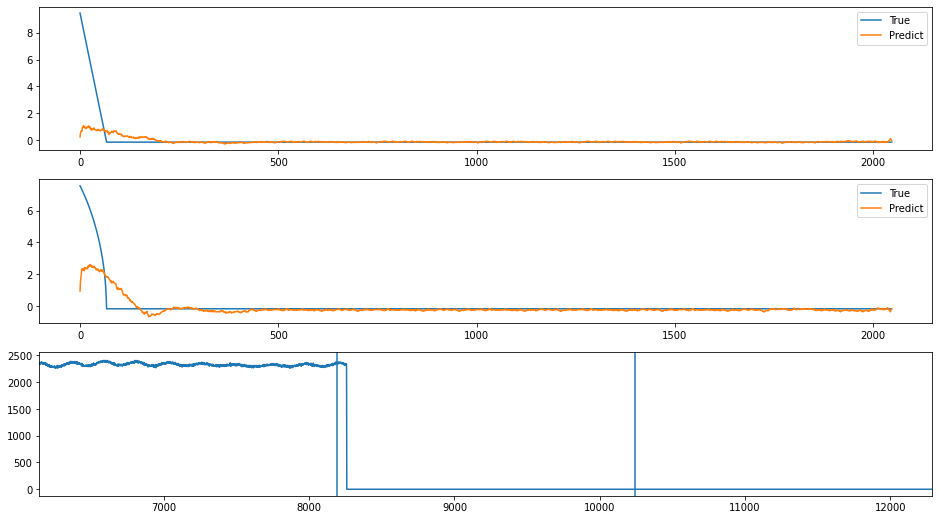

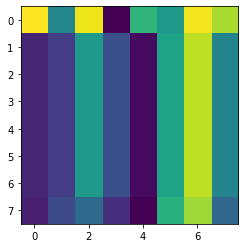

index: 221173
Error: 0.5998245530833507
type                                                         Inst
fill                                                         7342
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 04:17:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7342/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                           6
Name: 1662, dtype: object


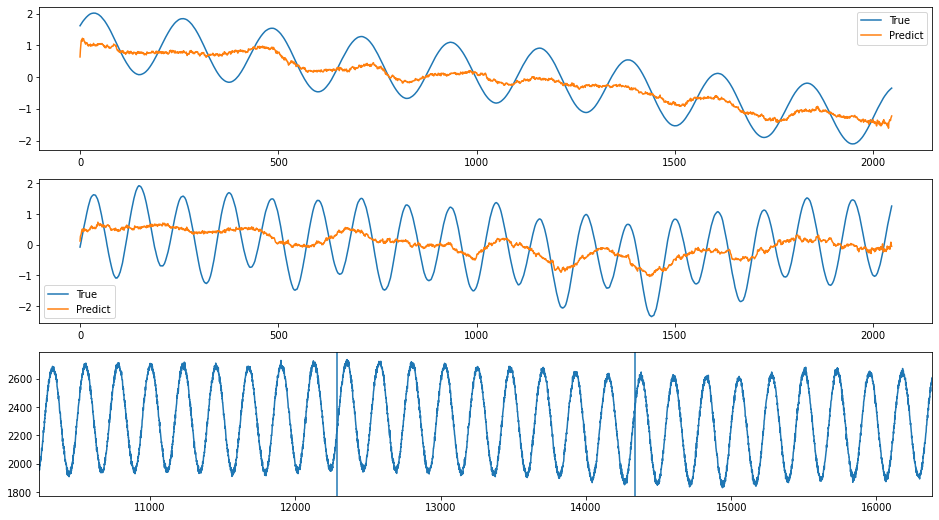

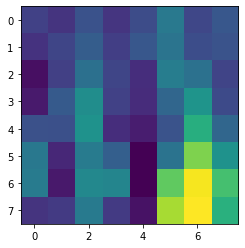

index: 124070
Error: 0.5323048824261258
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                   783
bunch_number                                                  421
ts_length                                                   65536
chunk                                                          27
Name: 7129, dtype: object


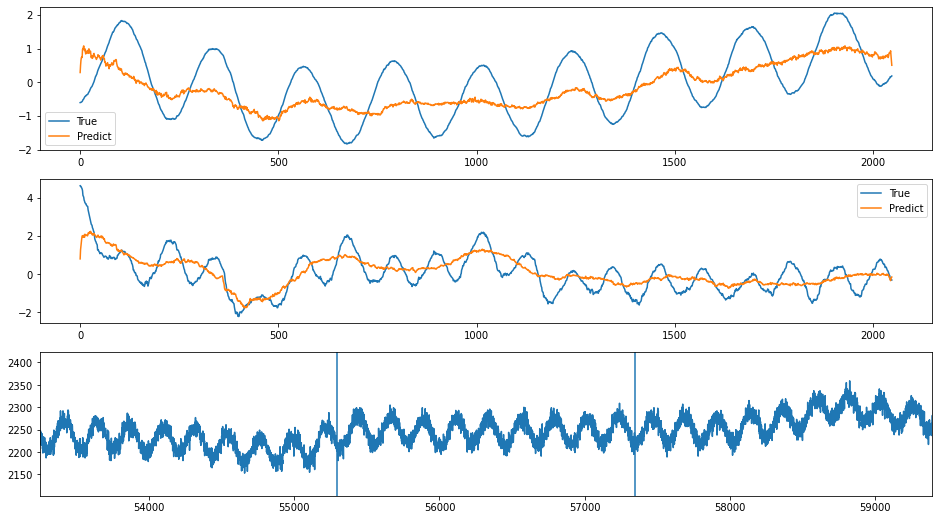

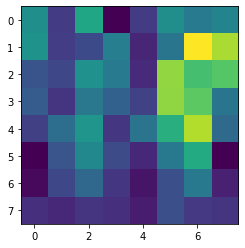

index: 88379
Error: 0.5245464024089048
type                                                         Inst
fill                                                         6691
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 16:50:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6691/...
n_bunches                                                     305
bunch_index                                                  2160
bunch_number                                                  266
ts_length                                                   65536
chunk                                                          26
Name: 6887, dtype: object


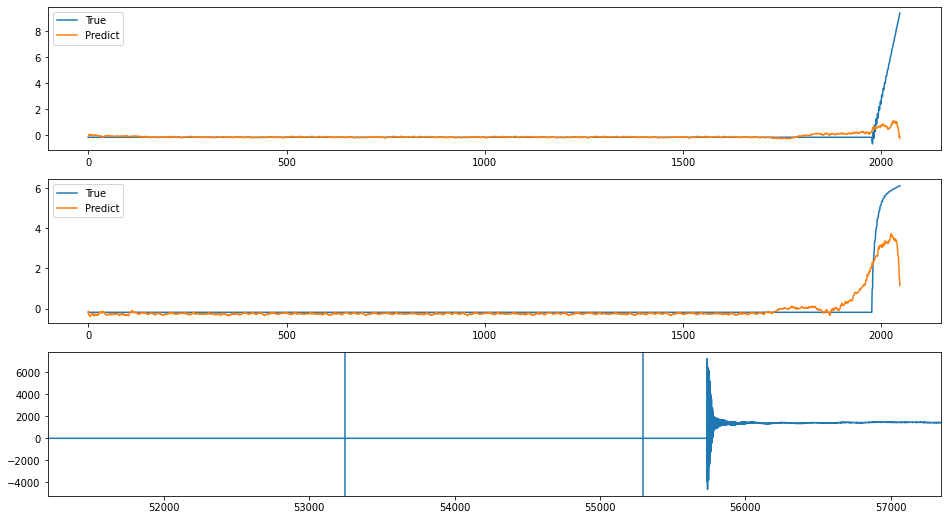

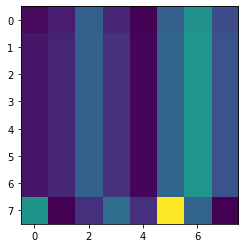

index: 281917
Error: 0.5010369795456178
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 13:15:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                     780
bunch_index                                                  1362
bunch_number                                                  738
ts_length                                                   65536
chunk                                                          24
Name: 6177, dtype: object


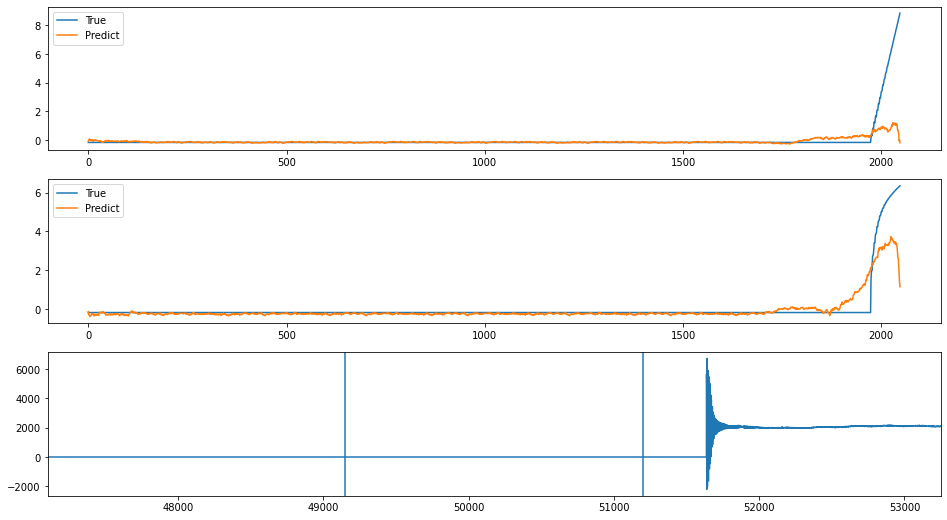

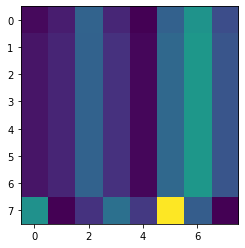

index: 339647
Error: 0.4999444321123122
type                                                         Inst
fill                                                         7468
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-23 19:21:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/...
n_bunches                                                     229
bunch_index                                                   946
bunch_number                                                  195
ts_length                                                   65536
chunk                                                          11
Name: 3064, dtype: object


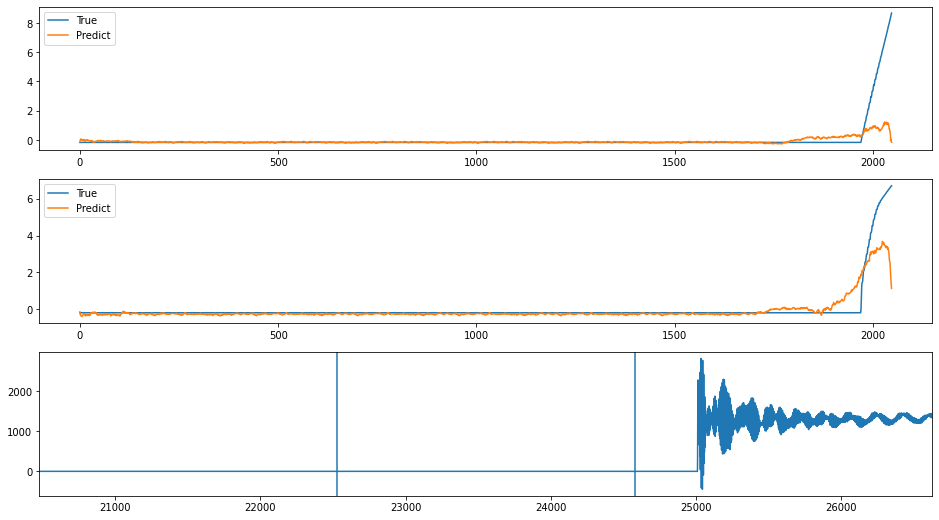

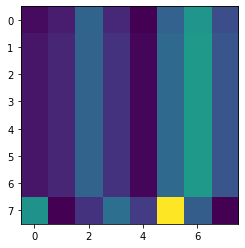

index: 242689
Error: 0.4875104785965708
type                                                         Inst
fill                                                         7109
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 19:45:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7109/...
n_bunches                                                     924
bunch_index                                                  1243
bunch_number                                                  920
ts_length                                                   65536
chunk                                                          28
Name: 7182, dtype: object


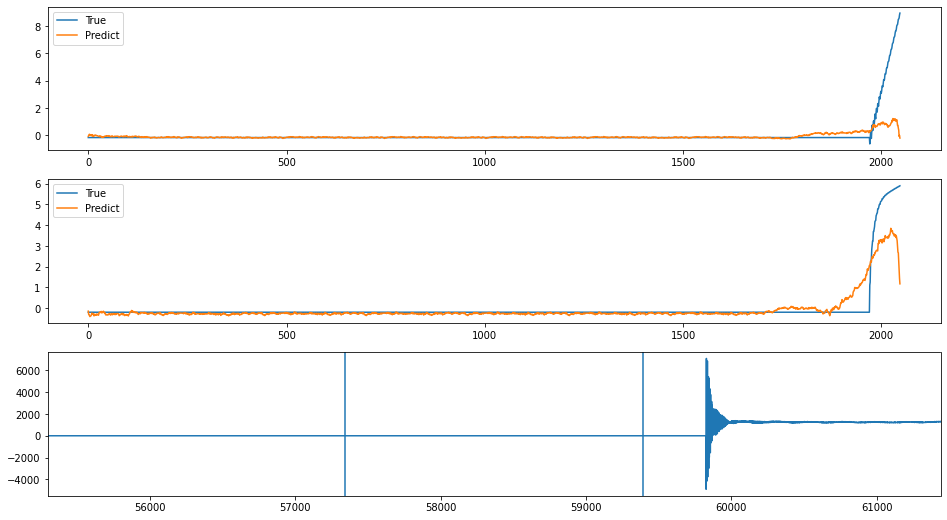

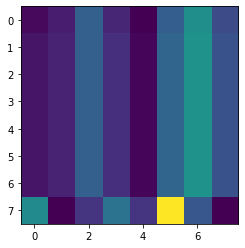

index: 248344
Error: 0.48095507101734986
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:16:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     780
bunch_index                                                  1334
bunch_number                                                  718
ts_length                                                   65536
chunk                                                           5
Name: 1404, dtype: object


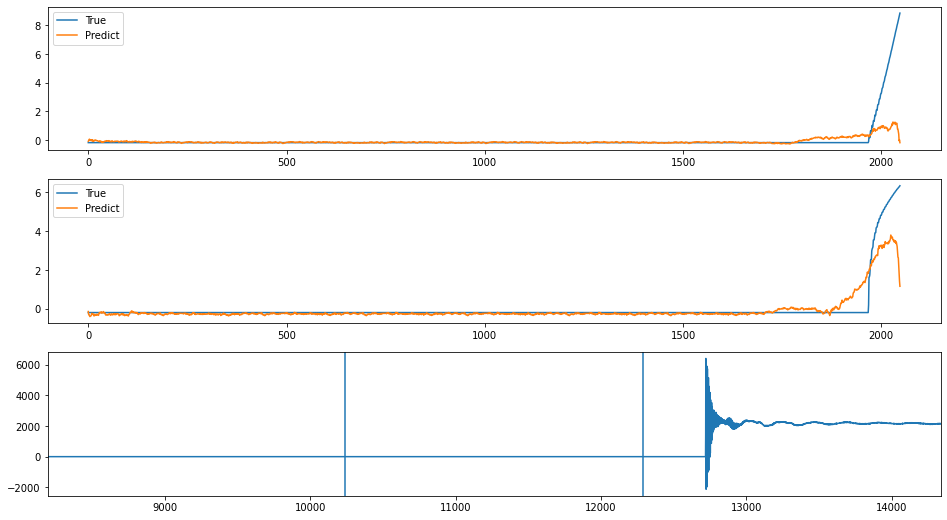

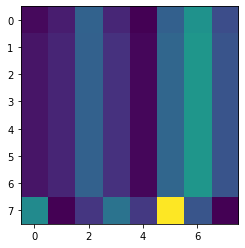

index: 166919
Error: 0.45461587537112935
type                                                         Inst
fill                                                         7325
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-21 18:57:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7325/...
n_bunches                                                     396
bunch_index                                                   507
bunch_number                                                  361
ts_length                                                   65536
chunk                                                          10
Name: 2666, dtype: object


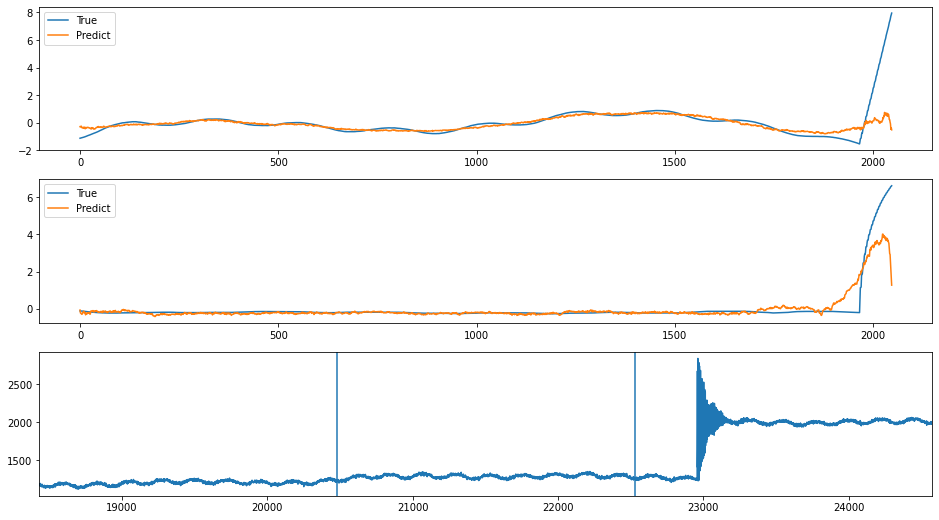

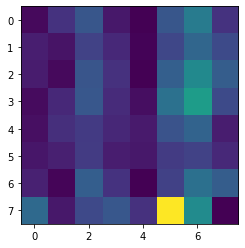

index: 171589
Error: 0.4532594900726937
type                                                         Inst
fill                                                         6170
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-05 19:53:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6170/...
n_bunches                                                    1300
bunch_index                                                  2055
bunch_number                                                 1012
ts_length                                                   65536
chunk                                                          25
Name: 6591, dtype: object


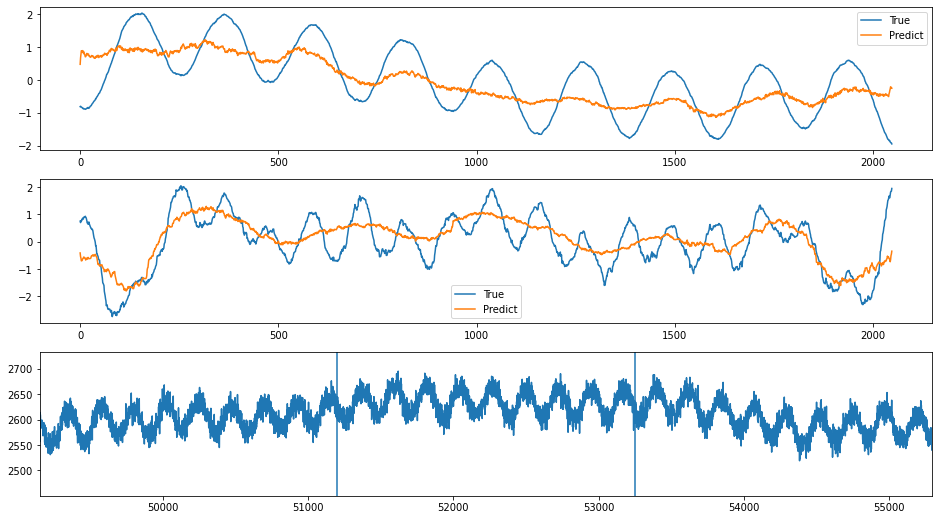

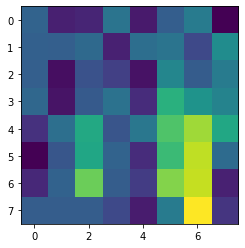

index: 219885
Error: 0.4499332581089215
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                  1504
bunch_number                                                  825
ts_length                                                   65536
chunk                                                          27
Name: 7109, dtype: object


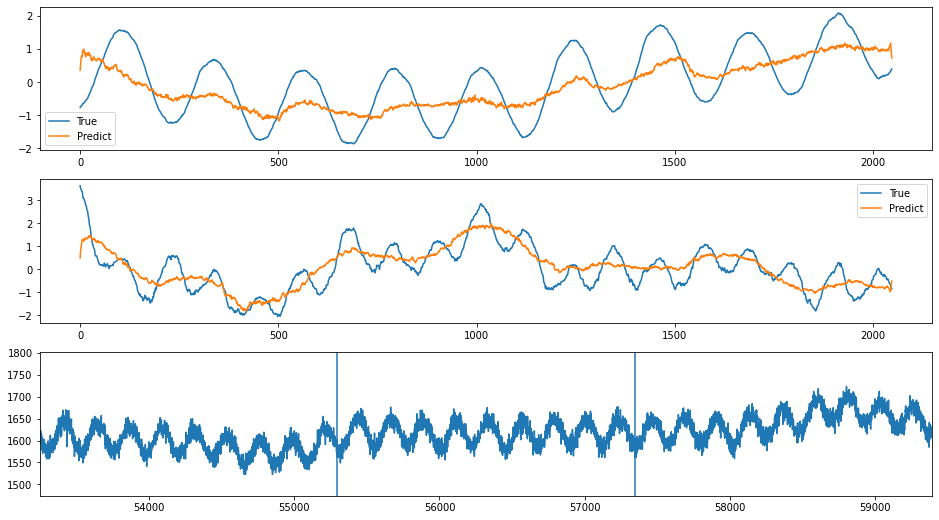

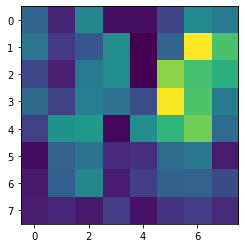

index: 199909
Error: 0.4462399910066319
type                                                         Inst
fill                                                         6397
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-18 13:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6397/...
n_bunches                                                     524
bunch_index                                                   870
bunch_number                                                  358
ts_length                                                   65536
chunk                                                           3
Name: 832, dtype: object


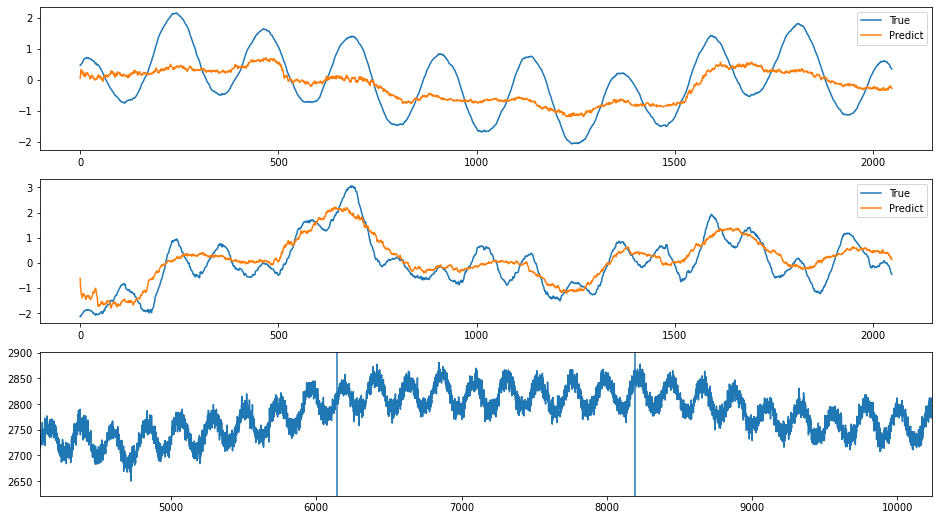

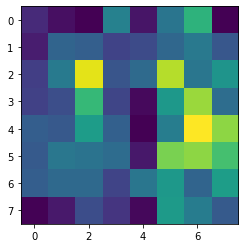

index: 384251
Error: 0.44204415913443856
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2646
bunch_number                                                  560
ts_length                                                   65536
chunk                                                           6
Name: 1759, dtype: object


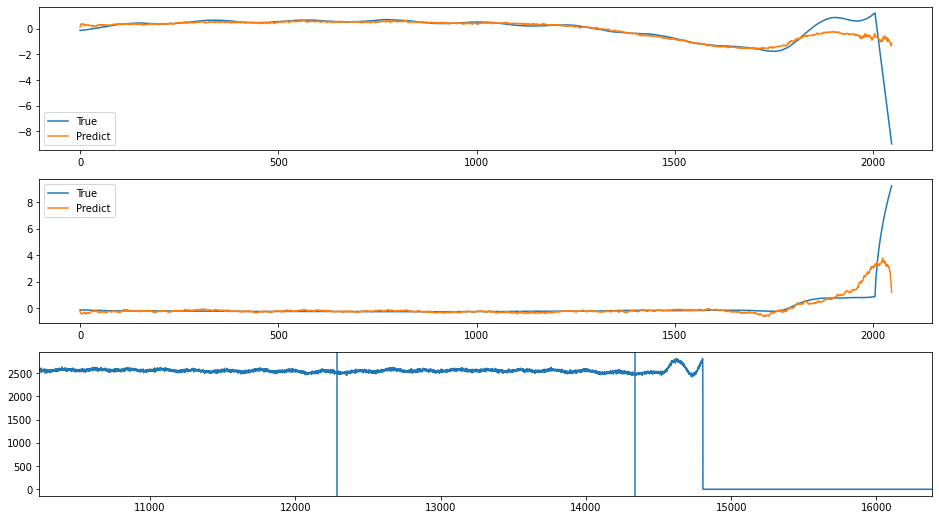

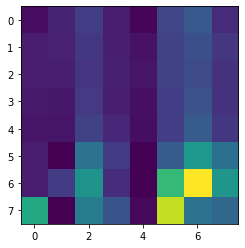

index: 22027
Error: 0.44195399976256344
type                                                         Inst
fill                                                         6768
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 07:58:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...
n_bunches                                                     636
bunch_index                                                   832
bunch_number                                                  587
ts_length                                                   65536
chunk                                                          24
Name: 6325, dtype: object


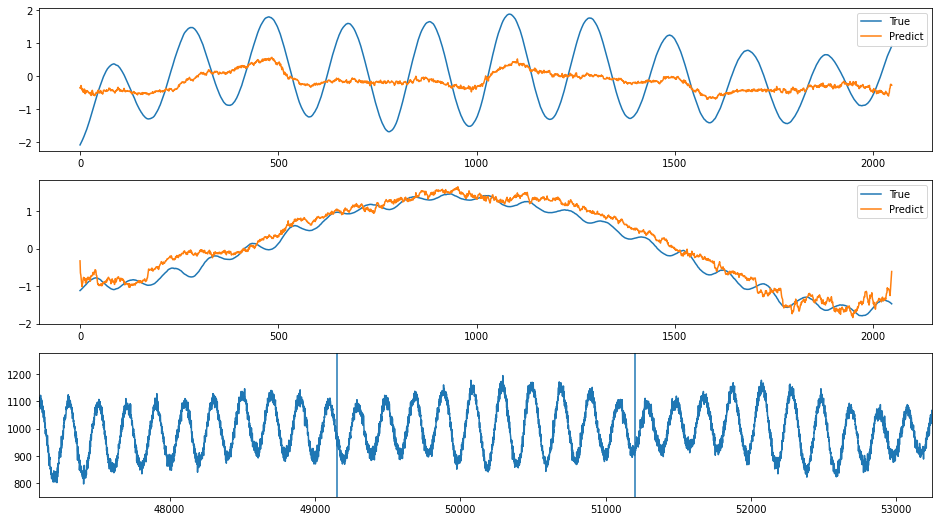

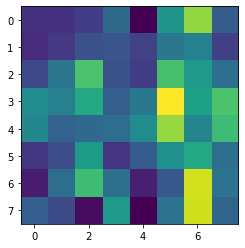

index: 331769
Error: 0.42600822188117726
type                                                         Inst
fill                                                         7139
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 18:18:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7139/...
n_bunches                                                    1212
bunch_index                                                   318
bunch_number                                                  217
ts_length                                                   65536
chunk                                                          26
Name: 6666, dtype: object


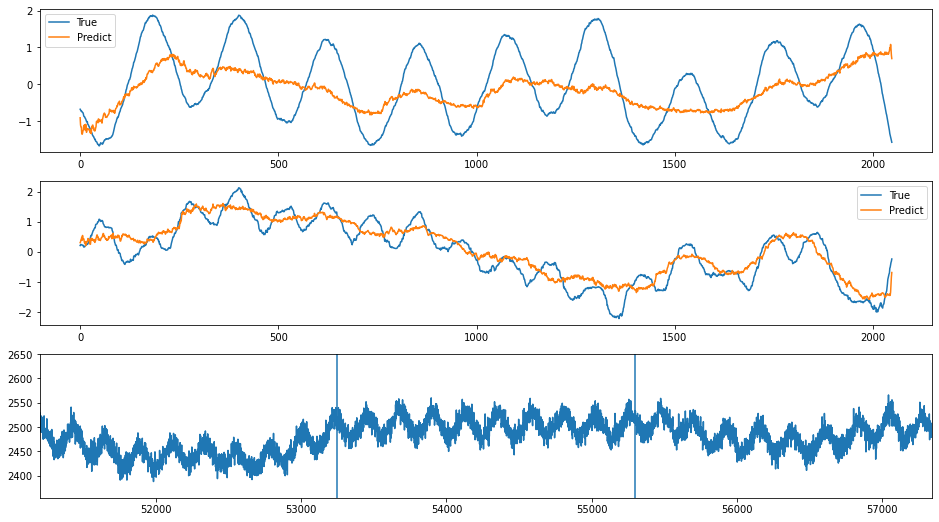

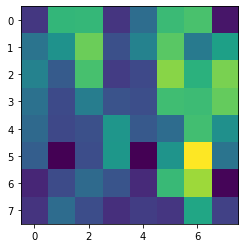

index: 52065
Error: 0.42272886864828074
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 08:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                     828
bunch_index                                                   870
bunch_number                                                  631
ts_length                                                   65536
chunk                                                          30
Name: 7935, dtype: object


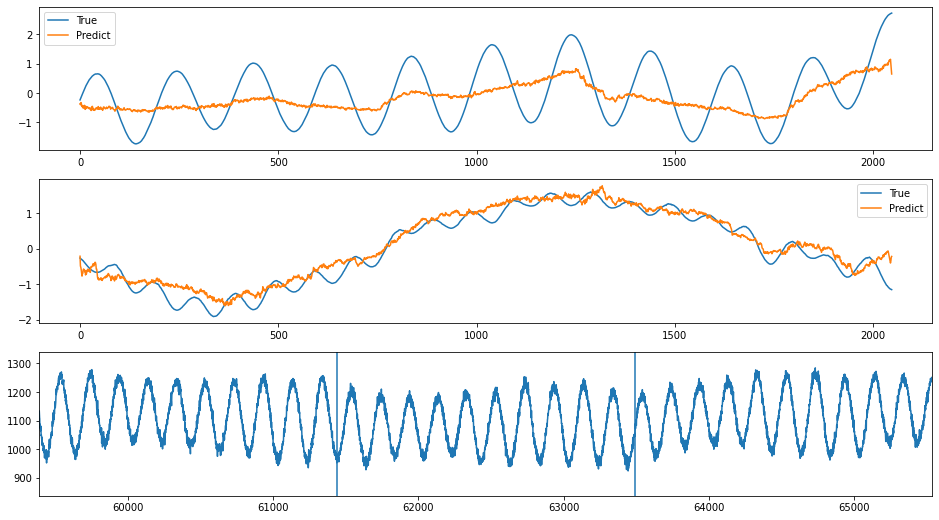

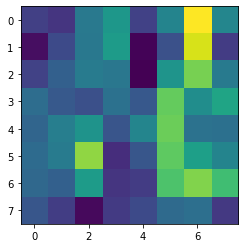

index: 145079
Error: 0.41858437303247187
type                                                         Inst
fill                                                         6404
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-21 17:10:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6404/...
n_bunches                                                     656
bunch_index                                                  3188
bunch_number                                                  607
ts_length                                                   65536
chunk                                                          30
Name: 7767, dtype: object


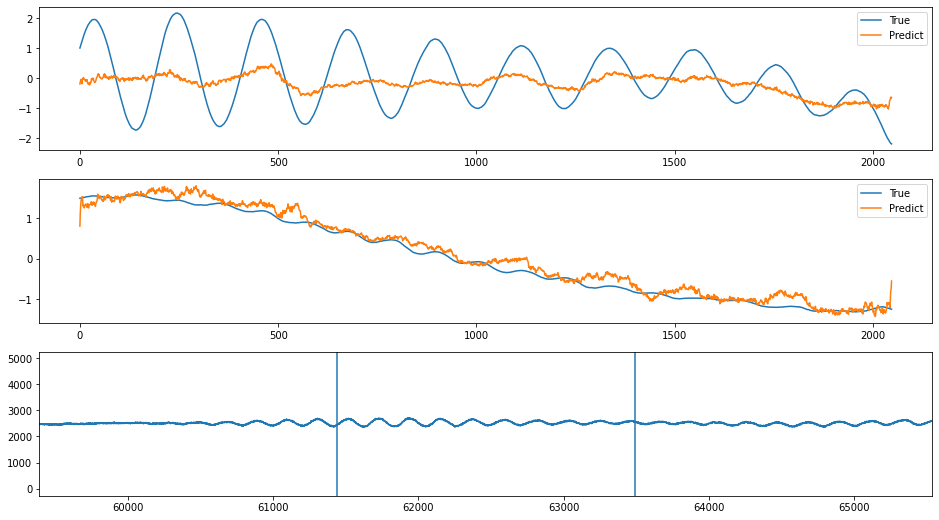

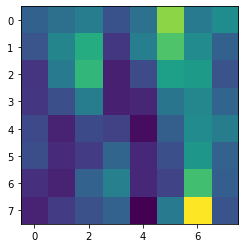

index: 42635
Error: 0.4177850480961173
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:47:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     300
bunch_index                                                   239
bunch_number                                                  121
ts_length                                                   65536
chunk                                                          19
Name: 5040, dtype: object


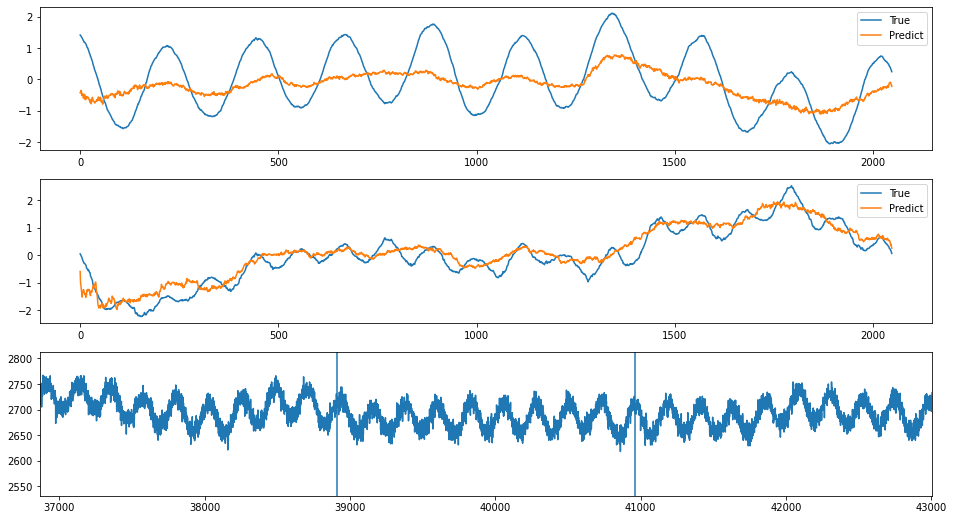

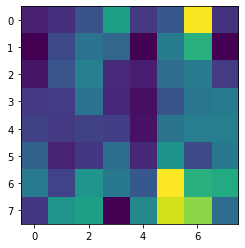

index: 104218
Error: 0.41671491317603115
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                   799
bunch_number                                                  433
ts_length                                                   65536
chunk                                                          27
Name: 7105, dtype: object


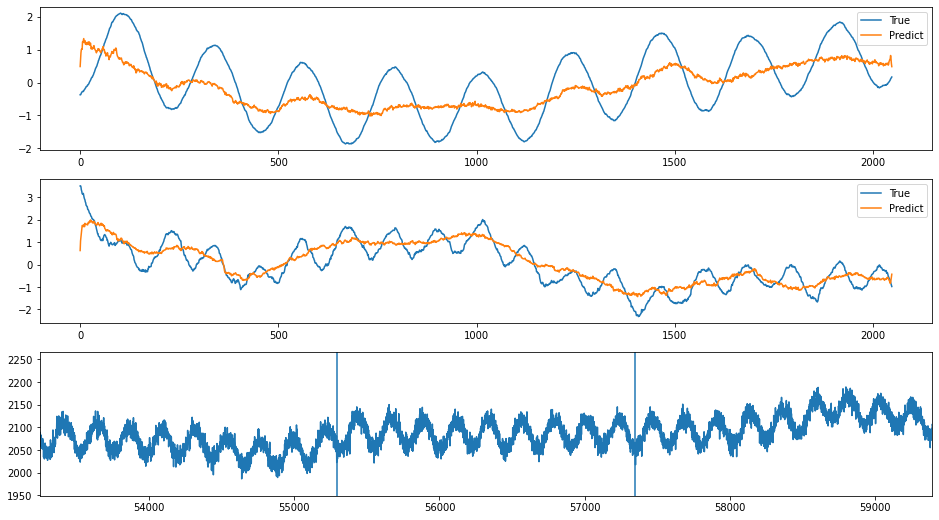

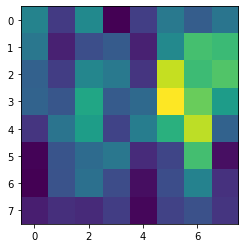

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 268429
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          12
Name: 3102, dtype: object


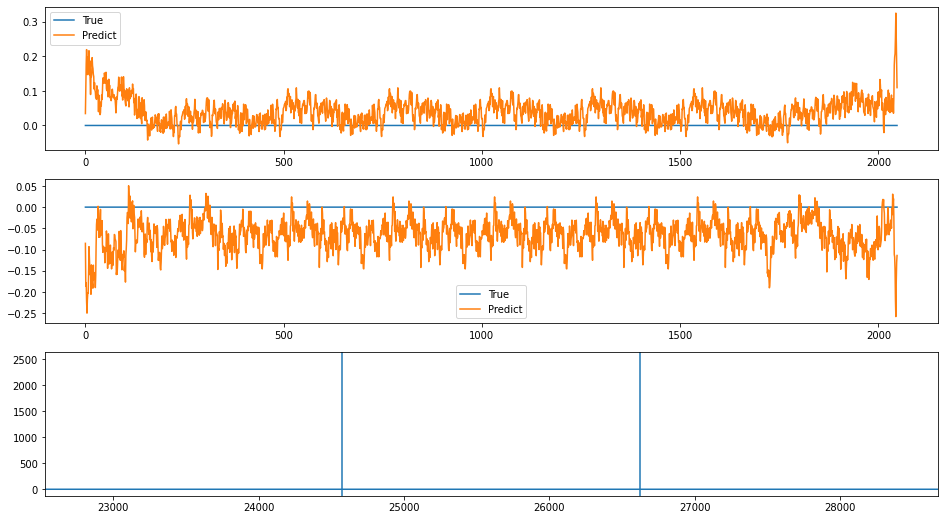

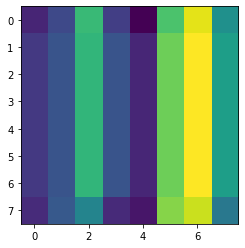

index: 267326
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                           8
Name: 2078, dtype: object


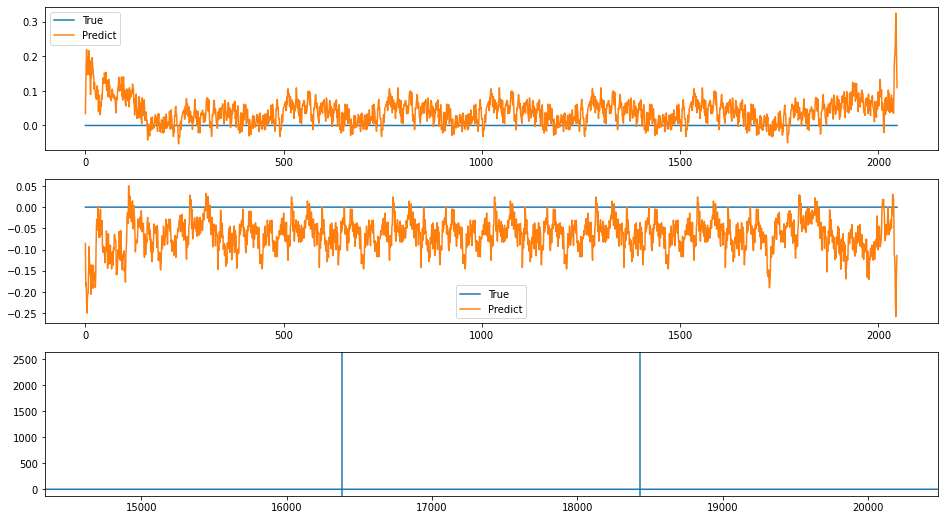

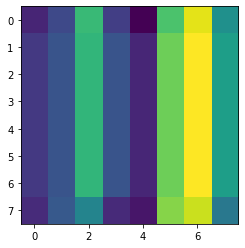

index: 269466
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          30
Name: 7710, dtype: object


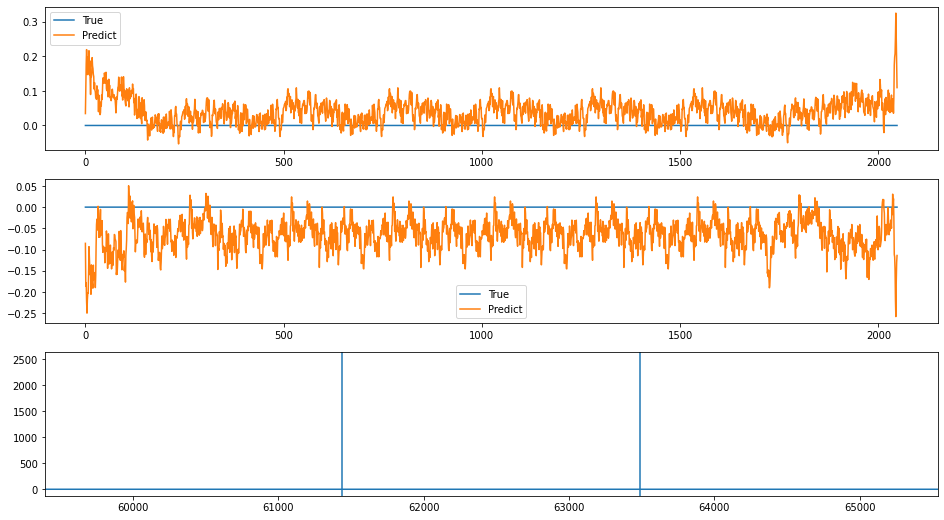

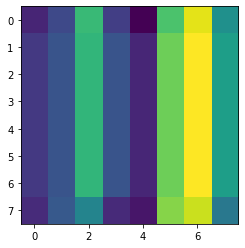

index: 269651
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          17
Name: 4382, dtype: object


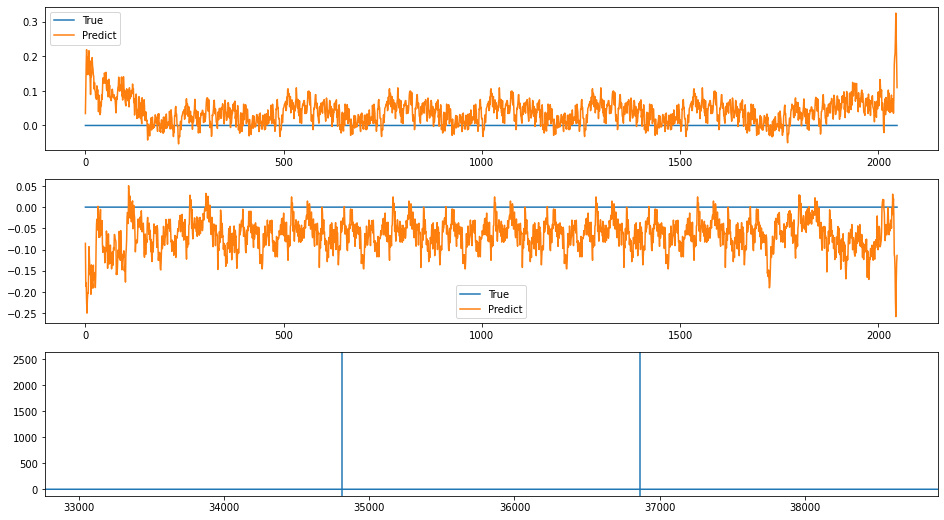

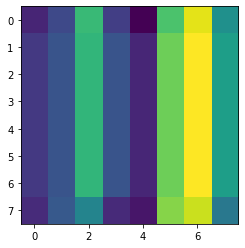

index: 263049
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          13
Name: 3358, dtype: object


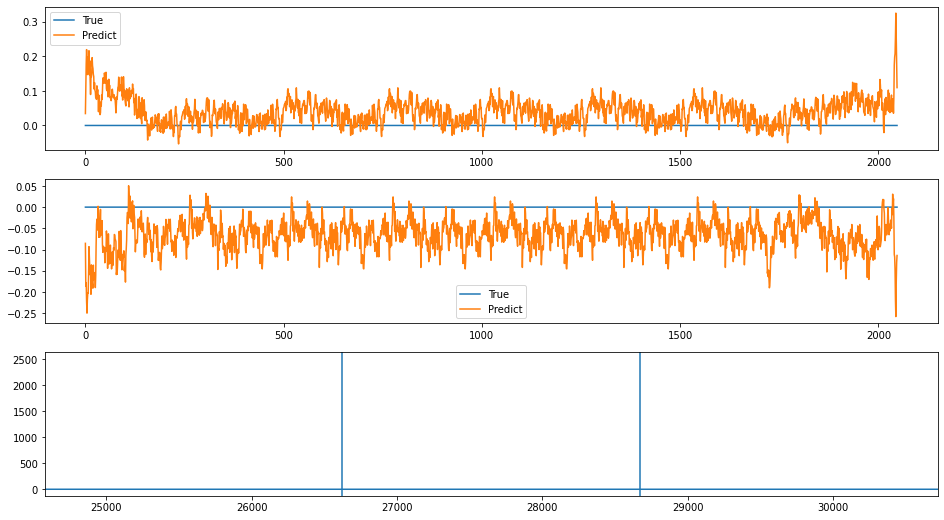

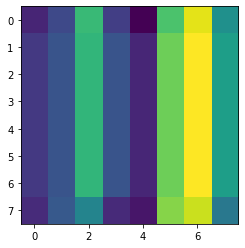

index: 268528
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          15
Name: 3870, dtype: object


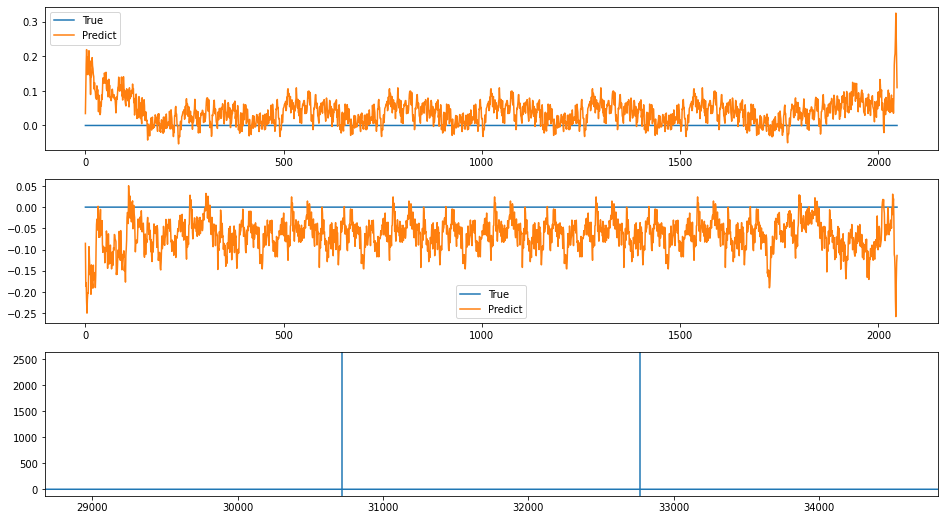

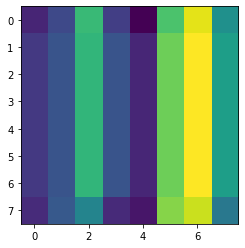

index: 263810
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          14
Name: 3614, dtype: object


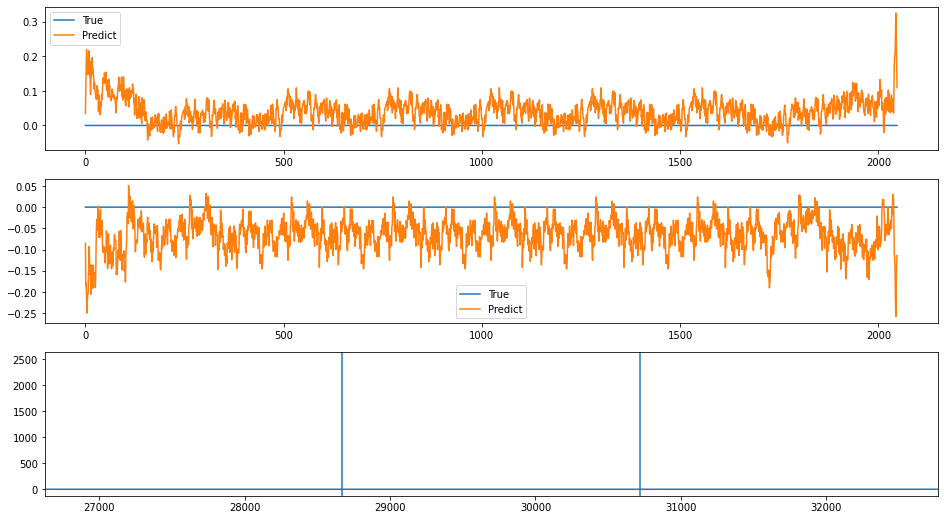

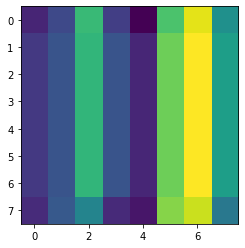

index: 266003
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          28
Name: 7198, dtype: object


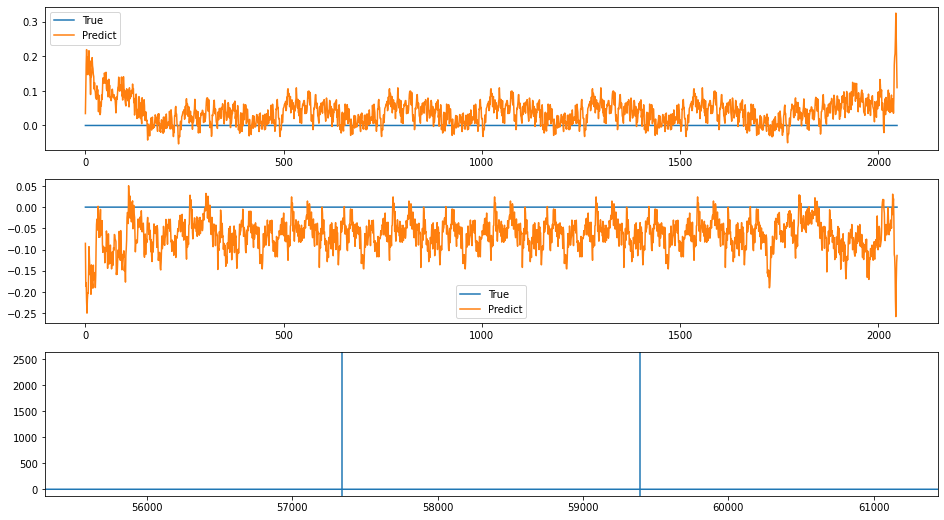

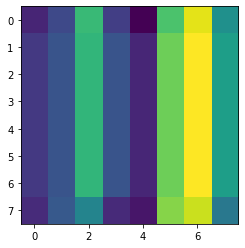

index: 264398
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          26
Name: 6686, dtype: object


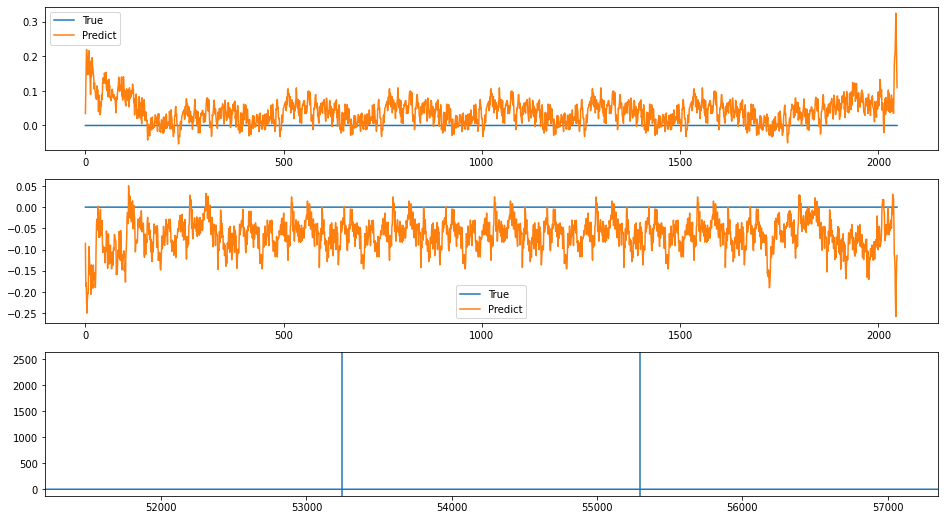

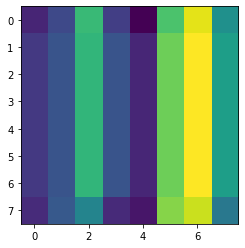

index: 262728
Error: 0.004271746894774627
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                    45
bunch_number                                                   12
ts_length                                                   65536
chunk                                                          27
Name: 6942, dtype: object


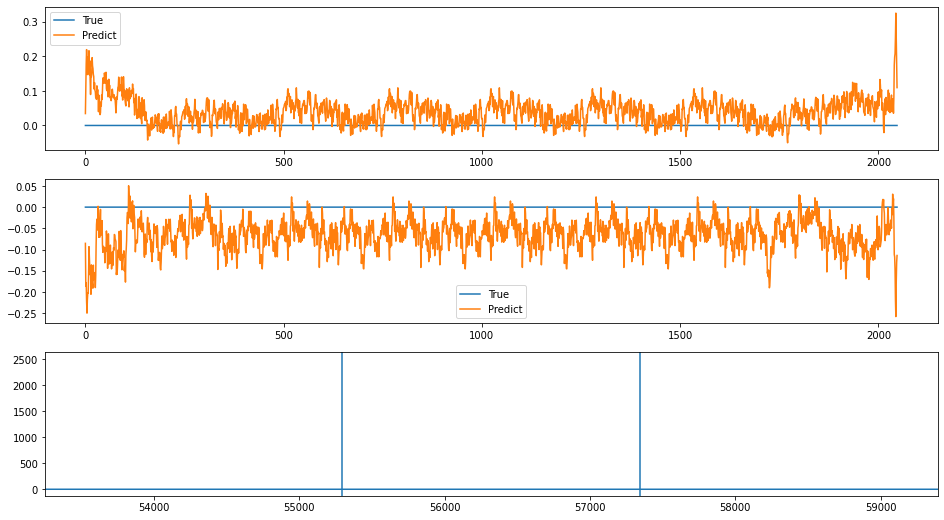

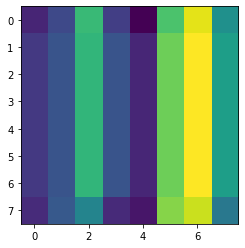

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

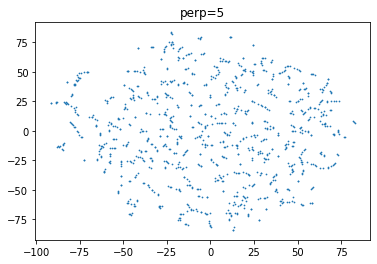

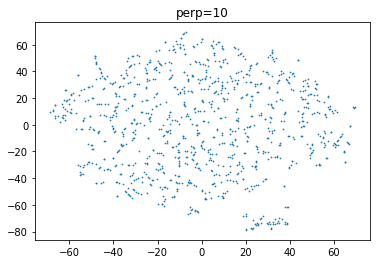

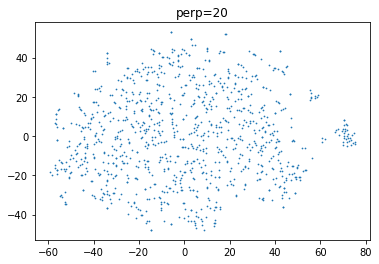

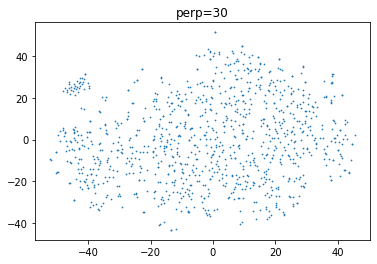

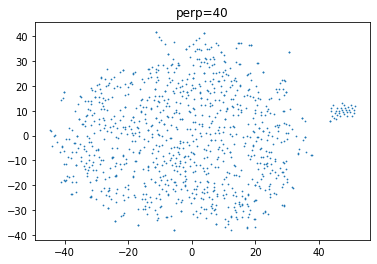

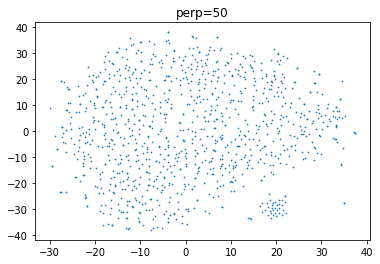

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

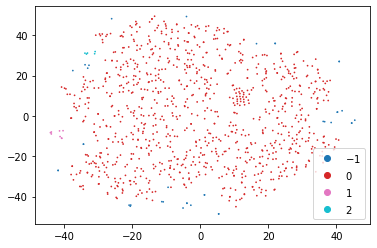

cluster -1
N samples: 38


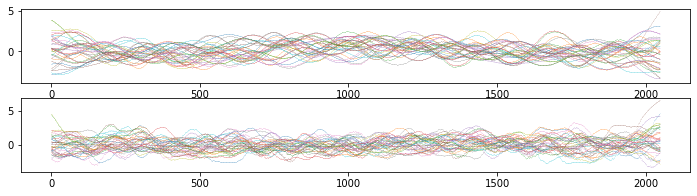

cluster 0
N samples: 973


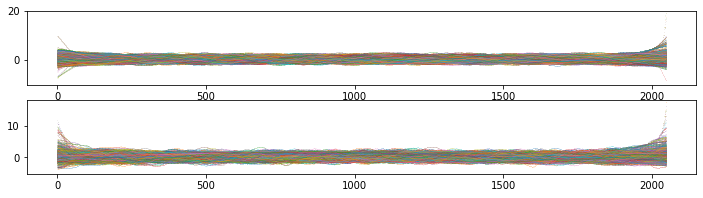

cluster 1
N samples: 8


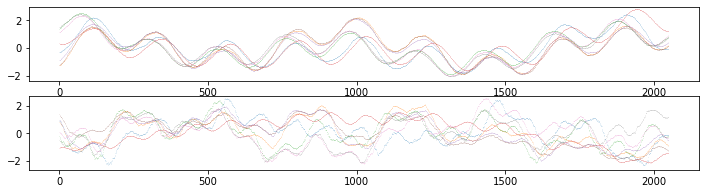

cluster 2
N samples: 5


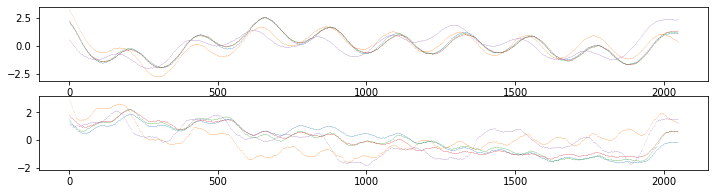

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()